# **Computer Vision - FINAL PROJECT**
### Students's Full Name: <mark>Ignacio Garach Vélez</mark> y <mark>Javier Ojeda Baena</mark>
# Value: 25 points | Due date: January 17th 23:59 | Submission site: https://pradogrado2223.ugr.es/

Guía de realización:

1.-Todos los proyectos son para **dos alumnos**. Se podrá autorizar a un solo estudiante si el número total de estudiantes es impar o el caso es extraordinario.\

2.-Una vez elegido el proyecto, se subirá a PRADO el nombre de los alumnos participantes y la propuesta de proyecto. **SOLO UNA VEZ (1 alumno)**. La aprobación por parte del profesor aparecerá en PRADO.

3.-El **22 de diciembre** todos los alumnos de proyecto deberán tener asignado uno. Cambios posteriores de proyecto solo serán aprobados si aparecen condiciones imprevistas que impiden la realización del previamenbte asignado.

4.- Ambos alumnos reciben la misma nota\


5.- Se pueden utilizar módulos de alto nivel de OpenCV o módulos de otras librerias para realuizar algunos passo de la implemenetación. Pero en estos casos, sólo se valora su uso. El uso intensivo de módulos de alto nivel podría disminuir, muy notablemente, la contribución personal y la nota.

6.-Todos los proyectos deben entregar un cuaderno Colab con los resultados obtenidos. 

7.- El cuaderno debe incluir:
1. Un **enlace** para descargar el conjunto de **datos final utilizado en entrenamiento y test**. **NO SUBIR LOS DATOS A PRADO**
2. Una definición clara de la tarea a resolver y el enfoque elegido.
3. Comentarios sobre los beneficios del enfoque y la implementación.
4. Evaluaciones del modelo usando un conjunto de prueba.
5. Posibles propuestas de mejora de la técnica.

7.- En la evaluación se considerarán los siguientes aspectos:
1. La descripción e interés del problema, la dificultad de la tarea/base de datos,
2. El enfoque elegido,
3. El dominio de las técnicas utilizadas,
4. La calidad de la implementación,
5. El estudio experimental, y los resultados obtenidos.

**El cuaderno debe ejecutarse sin errores de principio a fin**. No se valorarán aquellos proyectos con errores de ejecución.

8.- Subir a PRADO solo el cuaderno .ipynb y posibles ficheros auxiliares (.py).

En clase/tutorías/correo electrónico se irá contestando a todas las preguntas que haya sobre los mismos. **Los desarrollos se realizarán con Colab y Fastai por lo que se deberá de tener muy presente el uso optimizado de la memoria**.  

# **Por copia se entenderá la utilización de código ajeno extraído de Internet o de cualquier otra fuente que no haya sido previamente autorizado por el profesor o no se informe de su origen en el cuaderno.**

# *Descripción del proyecto realizado:*
Propuestas de mejora sobre el dataset DermaMNIST utilizando la red MobileNetv3Small preentrenada sobre Imagenet 

Se trata de mejorar las métricas Accuracy y AUC sobre estos datos de lesiones cutáneas con 7 clases, con algunos ratios de desbalanceo altos. Para comparar, la web MedMNIST incluye los resultados logrados con modelos Resnet y de AutoML que se usaran como Baseline (https://arxiv.org/pdf/2010.14925.pdf). 
Para ello, se trataran de aplicar las técnicas vistas en teoría y en la práctica 2, así como de control del desbalanceo. Se profundizará en el ajuste fino de los modelos.


| Methods              | AUC     | ACC     |
|----------------------|---------|---------|
| ResNet-18(28)[6]     | $0.899$ | $0.721$ |
| ResNet-18(224)[6]    | $0.896$ | $0.727$ |
| ResNet-50(28)[6]     | $0.886$ | $0.710$ |
| ResNet-50(224)[6]    | $0.895$ | $0.719$ |
| autosklearn[7]       | $0.906$ | $0.734$ |
| AutoKeras[8]         | $0.921$ | $0.756$ |
| Google AutoML Vision | **0.925** | **0.766** |


# *Descripción de la BBDD usada con descripción de los conjuntos de entrenamiento y test generados:* 

DermaMNIST: lesiones cutáneas con 7 clases desbalanceadas, se va a usar la resolución 28 por 28, para poder comparar, pues es la que se usa en el paper, aunque las imágenes se pueden obtener por otras vías a mayor resolución. A posteriori se optó por hacer un Resize a resolución 224x224 pues aún era factible computacionalmente y mejoraban bastante los resultados.

Se utilizán los conjuntos de entrenamiento, validación y test propuestos en el paper del dataset, para poder compararlos con sus resultados. Se utilizan un 70 por ciento para training, 10 por ciento para validación y 20 por ciento para test, todos ellos estratificados para tratar de mantener la distribución de las clases.

# *Enlace a los datos de entrenamiento y test*:

Descargados vía la librería oficial medmnist, se ha facilitado el acceso a la cuenta nicolas@go.ugr.es
Enlace de descarga: https://drive.google.com/drive/folders/1ZtfhYP7iwzsfsOS45PAOs7QBzvvG_O9G?usp=share_link

# *Descripción y justificación del modelo/aproximación usado:*

Se ha utilizado el modelo MobileNet V3 Small del artículo 
HOWARD, Andrew, et al. Searching for mobilenetv3. En Proceedings of the IEEE/CVF international conference on computer vision. 2019. p. 1314-1324
pero preentrenado con ImageNet1K y se utilizará para transferencia de conocimiento en nuestro dataset, mediante ajuste fino.

La arquitectura base de MobileNet trata de ser entrenable y sobre todo aplicable de forma muy eficiente, pues está orientada a su utilización en dispositivos móviles. En nuestro caso, las lesiones de tipo dermatológico en general deben ser estudiadas con detalle y no tenemos esta necesidad de velocidad tan alta en predicción, pero para otras aplicaciones médicas como detección de tipo de quemaduras o incluso para detecciones de este tipo en lugares sin recursos puede ser una buena propiedas.

El modelo combina una primera fase de bloques convolucionales al estilo habitual, de tamaño 3x3, partiendo de 3 canales y ampliandolos (no en exceso)conforme aumenta la profundidad a la vez que reduce la resolución de la entrada, combinandolos con capas de BatchNormalization y aprendiendo mediante funciones de activación ReLU y HardSwish.

HardSwish trata de utilizar el producto de la identidad por una aproximación ReLU de la sigmoidal más eficiente para los cálculos de entrenamiento:

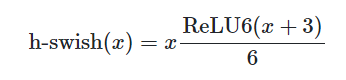


A continuación, en la red aparecen las convoluciones 1x1, o pointwise, como las llama en el artículo a partir de los mapas de características obtenidos en las primeras capas con bloques de Average Pooling, a partir de ahí, recupera dimensión y vuelve a aplicar bloques convolucionales 3x3 junto con capas de BatchNorm, y funciones de activación HardSwish y HardSigmoid, siendo esta última una aproximación lineal a trozos de la sigmoide, con pendiente más abrupta que esta en torno al 0.

Para terminar, se añade una cabeza con 2 capas Fully-Connected con BatchNorm1D y Dropout con p=0.5 entre ellas.

# *Descripción de las mejoras aportadas al modelo inicial:*

Se ha efectuado transferencia de conocimiento a partir del modelo preentrenada con Imagenet, para tratar de usarlo como extractor de características de nuestro nuevo dataset y ver si es capaz de competir con los modelos ResNet y de AutoML del artículo original, los resultados que se irán comentando fueron bastante positivos, y aunque dan espacio a futuras mejoras, realizan un buen trabajo para la resolución que se tiene, si se observa alguna imagen, se verá que a simple vista hay clases que resultarían indistinguibles incluso para un especialista.

Se ha tratado de aplicar normalización estándar a los datos.

Se han utilizado técnicas de OverSampling para paliar el posible sesgo hacia la clase mayoritaria.

Se han utilizado 2 técnicas de balanceo mediante el uso de pesos en la función de pérdida para las diferentes clases.

Se ha utilizado Data Augmentation, en distintas variantes, tanto para aumentar la variabilidad y calidad de los datos de entreneamiento, como para paliar el desbalanceo.

Se han probado algunas cabezas con núcleos convolucionales después del extractor de características.

# ** A PARTIR DE AQUI AÑADIR EL CODIGO DEL PROYECTO CON LOS COMENTARIOS/VALORACIONES NECESARIAS PARA SU EVALUACIÓN.**

## Carga de datos mediante la librería fastai

Usamos el objeto DataBlock y cargamos los datos mediante el dataloader, para ello hemos optado por descomprimir el .npz de los datos en carpetas con imágenes PNG de cada clase y grupo. 
Así, podremos utilizar la carga por defecto de fastai y el GrandParentSplitter. Para que los resultados sean comparables con el artículo original y el estado del arte, mantendremos los conjuntos de entrenamiento, validación y test proporcionados en el dataset.

* No ejecutar el siguiente código.*

In [ ]:
''' CÓDIGO UTILIZADO PARA ADAPTAR EL DATASET A UN FORMATO MÁS AMABLE PARA FASTAI
data = np.load('dermamnist.npz')

train_images = data['train_images']
val_images = data['val_images']
test_images = data['test_images']
train_labels = data['train_labels']
val_labels = data['val_labels']
test_labels = data['test_labels']

from PIL import Image
i=0
for a, b in zip(train_images, train_labels):
    im = Image.fromarray(a)
    im.save("DermaMNIST/train/"+str(int(b))+"/"+str(i)+".png")
    i=i+1
i=0
for a, b in zip(val_images, val_labels):
    im = Image.fromarray(a)
    im.save("DermaMNIST/validation/"+str(int(b))+"/"+str(i)+".png")
    i=i+1
i=0
for a, b in zip(test_images, test_labels):
    im = Image.fromarray(a)
    im.save("DermaMNIST/test/"+str(int(b))+"/"+str(i)+".png")
    i=i+1

'''

' CÓDIGO UTILIZADO PARA ADAPTAR EL DATASET A UN FORMATO MÁS AMABLE PARA FASTAI\ndata = np.load(\'dermamnist.npz\')\n\ntrain_images = data[\'train_images\']\nval_images = data[\'val_images\']\ntest_images = data[\'test_images\']\ntrain_labels = data[\'train_labels\']\nval_labels = data[\'val_labels\']\ntest_labels = data[\'test_labels\']\n\nfrom PIL import Image\ni=0\nfor a, b in zip(train_images, train_labels):\n    im = Image.fromarray(a)\n    im.save("DermaMNIST/train/"+str(int(b))+"/"+str(i)+".png")\n    i=i+1\ni=0\nfor a, b in zip(val_images, val_labels):\n    im = Image.fromarray(a)\n    im.save("DermaMNIST/validation/"+str(int(b))+"/"+str(i)+".png")\n    i=i+1\ni=0\nfor a, b in zip(test_images, test_labels):\n    im = Image.fromarray(a)\n    im.save("DermaMNIST/test/"+str(int(b))+"/"+str(i)+".png")\n    i=i+1\n\n'

In [ ]:

import sys, cv2
(major, minor,_)=cv2.__version__.split(".")
if int(minor) < 5:
  if 'google.colab' in sys.modules:
    import subprocess
    subprocess.call("pip install -U opencv-python".split())

print(cv2.__version__)

4.6.0


In [ ]:
import sys
import subprocess
import pkg_resources

required = {'nbdev', 'fastbook'}
installed = {pkg.key for pkg in pkg_resources.working_set}
missing = required - installed
print(missing)

if 'nbdev' in missing:
    print("INSTALLING nbdev")
    !pip install nbdev
!pip list |grep nbdev    
if 'fastbook' in missing:
    print("INSTALLING fastbook")
    !pip install -Uqq fastbook
!pip list |grep fastbook

{'nbdev', 'fastbook'}
INSTALLING nbdev
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.1/64.1 KB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 KB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.0/79.0 KB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 44.1 MB/s eta 0:00:00
nbdev                         2.3.9
INSTALLING fastbook
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 KB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 452.9/452.9 KB 32.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 52.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 63.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 KB 7.7 MB/s eta 0:00:00
     

In [ ]:
# The first thing we should do is to apply hardware acceleration via GPU. So, we have to go to Editar - Configuracion del Cuaderno - Acelerador por Hardware GPU

# Now we SET UP Fastai
import fastbook
fastbook.setup_book()
import fastai
import fastcore
print(f'fastcore version {fastcore.__version__} installed')
print(f'fastai version {fastai.__version__} installed')
from nbdev.showdoc import *
from fastai.vision.all import *
from fastai.callback import *

Mounted at /content/gdrive
fastcore version 1.5.27 installed
fastai version 2.7.10 installed


In [ ]:
# Function to display evaluation metrics
import torch
@patch
@delegates(subplots)
def plot_metrics(self: Recorder, nrows=None, ncols=None, figsize=None, **kwargs):
    metrics = np.stack(self.values)
    names = self.metric_names[1:-1]
    n = len(names) - 1
    if nrows is None and ncols is None:
        nrows = int(math.sqrt(n))
        ncols = int(np.ceil(n / nrows))
    elif nrows is None: nrows = int(np.ceil(n / ncols))
    elif ncols is None: ncols = int(np.ceil(n / nrows))
    figsize = figsize or (ncols * 6, nrows * 4)
    fig, axs = subplots(nrows, ncols, figsize=figsize, **kwargs)
    axs = [ax if i < n else ax.set_axis_off() for i, ax in enumerate(axs.flatten())][:n]
    for i, (name, ax) in enumerate(zip(names, [axs[0]] + axs)):
        ax.plot(metrics[:, i], color='#1f77b4' if i == 0 else '#ff7f0e', label='valid' if i > 0 else 'train')
        ax.set_title(name if i > 1 else 'losses')
        ax.legend(loc='best')
    plt.show()

In [ ]:
from pathlib import Path
%cd '/content/gdrive/My Drive'
path = Path('VC_PF/DermaMNIST')

/content/gdrive/My Drive


Se ha optado por utilizar un tamaño de batch de 32, algo habitual en modelos de este tipo, los intentos con tamaños mayores y menores no se han documentado pues los resultados eran muy pobres.
Además se realiza un Resize de la imagen original a dimensión 224x224, en general las pruebas realizadas y documentadas en esta memoria reducían un 10 por ciento sus métricas, cuando se utilizaba 28x28. Es claro que esto aumenta los tiempos de entrenamiento pero es asumible y mejora mucho los resultados.

In [ ]:
#DataBlock 
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), # La entrada está formada por una Imagen 'ImageBlock' y una Categoría 'CategoryBlock'
    get_items=get_image_files,  # Método para obtener las imagenes
    splitter=GrandparentSplitter(train_name='train', valid_name='valid'), # Método para dividir los datos de train y validation, el 0.1 hace referencia al 10% para validation, seed es la semilla para la aleatoriedad
    get_y=parent_label, # Etiqueta de salida
    item_tfms=Resize(224),
    batch_tfms = []
).dataloaders(path, bs=32)  # Cargamos los datos para train de path/'train' y en minibatches de tamaño 32

En el batch que se muestra de forma aleatoria en la siguiente imagen, se hace patente el desbalanceo hacia la clase 5 que es mayoritaria, que como es habitual en dataset médico es una de las menos dañinas, se trata de nevus melanocíticos, lesiones benignas compuestas de melanocitos que portamos prácticamente toda la población, aunque es positivo detectarlas, pues en algunos casos pueden llegar a malignizarse.

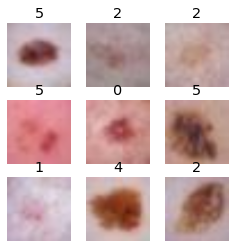

In [ ]:
dls.show_batch(max_n=9, figsize=(4,4))

## Experimento base : MobileNet Small 3.0
Efectuaremos transferencia de conocimiendo a partir de la red MobileNetSmall v.3.0 preentrenada por Imagenet, usaremos la siguiente función que efectua las épocas de ajuste fino que se le indiquen, con la paciencia de Early Stopping que se quiera, a continuación muestra las métricas de evaluación en entrenamiento y validación, para terminar calcula el accuracy de test y lo muestra junto con la matriz de confusión y el AUC score.

El área bajo la curva ROC en el caso multiclase es una métrica que se ha calculado macro-promediada con la estrategia One Vs. Rest, calculando AUC considerando pares de una clase contra todas las demás y promediandolo después todo, de esta forma quizá no se tiene en cuenta el mal resultado para algunas clases, pues las positivas lo compensan. Criticamos este modo de proceder del artículo original, porque el alto desbalanceo puede distorsionar los resultados (de hecho lo hace, para el resto de datasets, AUC es bastante menor), aunque entendemos que puede deberse a que en el resto de datasets de MedMNIST el grado de desbalanceo es menor y no se ha cambiado por homogeneidad.

En nuestra opinión es más razonable utilizar un sistema de pesos en el calculo de promedio basado en la ditribución de clases.

Aunque en general la valoración conjunta del accuracy y el AUC proporcionan una visión bastante completa del clasificador, que nosotros ampliaremos mediante el análisis de la matriz de confusión.

In [ ]:
from fastai.test_utils import *
from sklearn.metrics import roc_auc_score

def experiment(learn, n_epoch, files_test, cbs=null, freeze_epochs=1):
  if cbs == null:
    learn.fine_tune(epochs=n_epoch, freeze_epochs=freeze_epochs) # Entrenamos el modelo
  else:
    learn.fine_tune(epochs=n_epoch, cbs=cbs, freeze_epochs=freeze_epochs) # Entrenamos el modelo
  learn.recorder.plot_metrics() # sMostramos la curva a lo largo de las epocas
  test_dl = learn.dls.test_dl(files_test, with_labels=True)
  preds, targs = learn.get_preds(dl=test_dl)
  acc = accuracy(preds, targs)
  print('The test accuracy is : ', round(float(acc)*100, 4), '%')
  AUC = roc_auc_score(np.array(targs), np.array(preds), multi_class='ovr')
  print('The test AUC ROC is : ', round(float(AUC)*100, 4), '%')
  interp = ClassificationInterpretation.from_learner(learn, 1, test_dl)
  cm = interp.confusion_matrix()
  print('Number of test examples:', np.sum(cm))
  interp.plot_confusion_matrix(figsize=(6, 6),title='Confusion Matrix for the Test Set')

In [ ]:
model = create_vision_model(fastai.vision.models.mobilenet_v3_small, 7, True, n_in=3)
learn = Learner(dls, model, loss_func=CrossEntropyLossFlat(), metrics=accuracy)  # Modelo de aprendizaje, con los datos de dls, la red neuronal que hemos definido,                                                                           # CrossEntropyLoss como función de perdida y accuracy como métrica
learn.summary()

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V3_Small_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V3_Small_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Sequential (Input shape: 32 x 3 x 224 x 224)
Layer (type)         Output Shape         Param #    Trainable 
                     32 x 16 x 112 x 112 
Conv2d                                    432        True      
BatchNorm2d                               32         True      
Hardswish                                                      
____________________________________________________________________________
                     32 x 16 x 56 x 56   
Conv2d                                    144        True      
BatchNorm2d                               32         True      
ReLU                                                           
____________________________________________________________________________
                     32 x 16 x 1 x 1     
AdaptiveAvgPool2d                                              
____________________________________________________________________________
                     32 x 8 x 1 x 1      
Conv2d                                    13

In [ ]:
#DataBlock 
files_test = get_image_files(path/'test')

epoch,train_loss,valid_loss,accuracy,time
0,1.452754,1.541613,0.646062,00:34


epoch,train_loss,valid_loss,accuracy,time
0,0.928465,0.939456,0.690927,00:36
1,0.865535,0.823444,0.721834,00:34
2,0.837515,0.939178,0.712861,00:36
3,0.697221,0.796395,0.721834,00:35
4,0.678656,0.678157,0.757727,00:35
5,0.581587,0.790503,0.731805,00:33
6,0.542855,0.765207,0.742772,00:35
7,0.416129,0.861017,0.744766,00:33
8,0.300876,0.922881,0.737787,00:33
9,0.193074,1.018138,0.745763,00:34


No improvement since epoch 4: early stopping


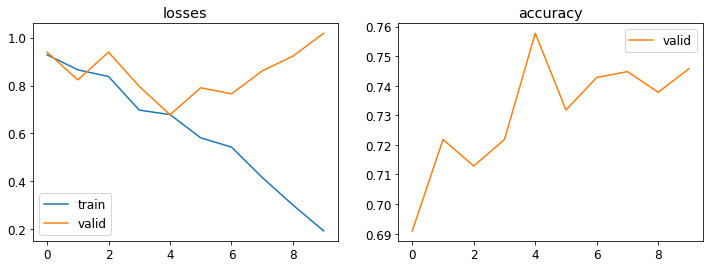

The test accuracy is :  75.1122 %
The test AUC ROC is :  90.2311 %


Number of test examples: 2005


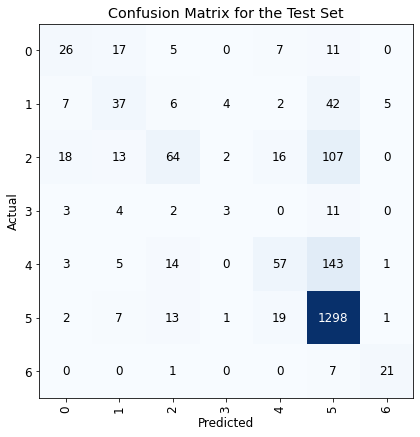

In [ ]:
experiment(learn, 15, files_test, cbs=EarlyStoppingCallback(monitor='accuracy', patience=5))

En esta primera aproximación, ya damos un paso bastante grande a pesar de que el comportamiento es extraño. Se logran unos valores de las métricas al nivel promedio de los obtenidos en el paper original, aunque aún superados por varios de ellos como Google AUTOML. Parece que el desbalanceo hace que no consigamos generalizar demasiado bien, el error de validación comienza a empeorar muy pronto, aunque a pesar de ello el accuracy se mantiene en torno al 75 por ciento.

La métrica AUC ya mejora a casi todas las de la tabla de base, pese a que en la matriz de confusión se observa como era de esperar que se realizan muchas predicciones erróneas de la clase mayoritaria, esto se aprecia en la sexta columna.

## Normalización de datos
En primer lugar vamos a llevar a cabo la normalización de las imágenes, en específico se sabe que para las redes neuronales convolucionales es un proceso que ayuda a la optimización en el método habitual de descenso de gradiente estocástico, ADAM o similares.

En nuestro caso vamos a utilizar uno de los 2 métodos más extendidos, la normalización a media 0 y varianza 1, para ello debemos calcular a priori la media y la varianza del conjunto de entrenamiento. Se ha utilizado un snippet de código bastante elegante tomado de https://towardsdatascience.com/fastai-bag-of-tricks-experiments-with-a-kaggle-dataset-part-1-135e46da72f2.

Es importante que estos datos se calculen sólo en training, y que en el momento de test se normalice según la media y varianza de training para evitar filtrado de información que puede hacer que sobreestimemos la calidad del modelo (data snooping). Esta es una política fundamental, dejar los datos que se utilicen en test vírgenes y no usarlos para nada más que eso.

In [ ]:
means = [xb.mean(dim=(0, 2, 3)) for xb, yb in dls.train]
stds = [xb.std(dim=(0, 2, 3)) for xb, yb in dls.train]
mean, std = torch.stack(means).mean(dim=0), torch.stack(stds).mean(dim=0)
print(mean, std)

TensorImage([0.7632, 0.5382, 0.5616], device='cuda:0') TensorImage([0.1341, 0.1517, 0.1666], device='cuda:0')


In [ ]:
m = mean
s = std

Volvemos a cargar los datos, esta vez con normalización.

In [ ]:
#DataBlock 
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), # La entrada está formada por una Imagen 'ImageBlock' y una Categoría 'CategoryBlock'
    get_items=get_image_files,  # Método para obtener las imagenes
    splitter=GrandparentSplitter(train_name='train', valid_name='valid'), # Método para dividir los datos de train y validation, el 0.1 hace referencia al 10% para validation, seed es la semilla para la aleatoriedad
    get_y=parent_label, # Etiqueta de salida
    item_tfms=Resize(224),
    batch_tfms = [Normalize.from_stats(m, s)]
).dataloaders(path, bs=32)  # Cargamos los datos para train de path/'train' y en minibatches de tamaño 32

In [ ]:
roc_auc_metric = RocAuc()
model = create_vision_model(fastai.vision.models.mobilenet_v3_small, 7, True, n_in=3)
learn = Learner(dls, model, loss_func=CrossEntropyLossFlat(), metrics=[accuracy, roc_auc_metric])  # Modelo de aprendizaje, con los datos de dls, la red neuronal que hemos definido,                                                                           # CrossEntropyLoss como función de perdida y accuracy como métrica
learn.summary()

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V3_Small_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V3_Small_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Sequential (Input shape: 32 x 3 x 224 x 224)
Layer (type)         Output Shape         Param #    Trainable 
                     32 x 16 x 112 x 112 
Conv2d                                    432        True      
BatchNorm2d                               32         True      
Hardswish                                                      
____________________________________________________________________________
                     32 x 16 x 56 x 56   
Conv2d                                    144        True      
BatchNorm2d                               32         True      
ReLU                                                           
____________________________________________________________________________
                     32 x 16 x 1 x 1     
AdaptiveAvgPool2d                                              
____________________________________________________________________________
                     32 x 8 x 1 x 1      
Conv2d                                    13

epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,0.734518,1.021155,0.703888,0.878644,00:33


epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,0.598836,0.584634,0.791625,0.943306,00:33
1,0.532126,0.633593,0.764706,0.934690,00:33
2,0.508440,0.675040,0.756730,0.922395,00:33
3,0.511963,0.765153,0.741775,0.923725,00:35
4,0.457020,0.725187,0.774676,0.920018,00:41
5,0.385312,0.937568,0.726820,0.913465,00:40


No improvement since epoch 0: early stopping


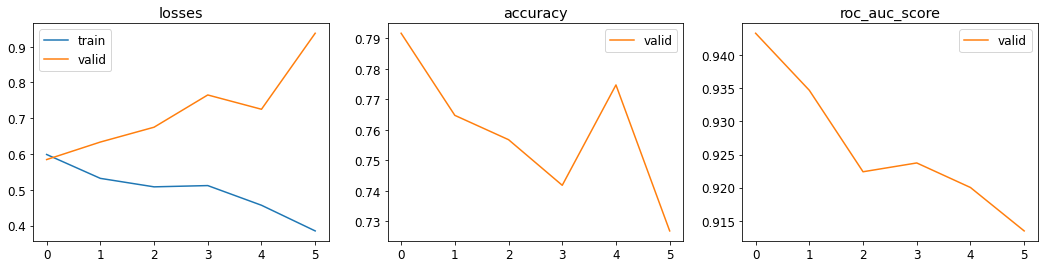

The test accuracy is :  73.0673 %
The test AUC ROC is :  90.8092 %


Number of test examples: 2005


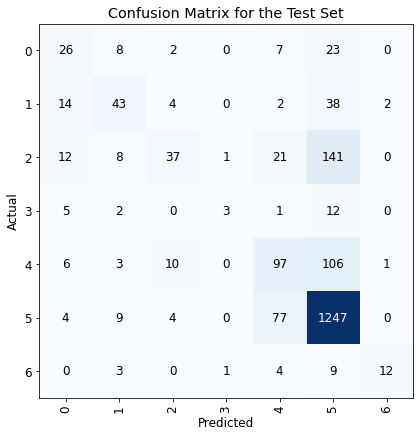

In [ ]:
experiment(learn, 15, files_test, cbs=EarlyStoppingCallback(monitor='accuracy', patience=5))

Seguramente el hecho de empeorar notablemente los resultados pueda deberse a que la media del train y el test no es demasiado grando y ello provoca una distorsión sobre las predicciones finales de nuestro modelo. De hecho podemos resaltar en la matriz de confusión como de los elementos de la cuarta clase solo ha sido capaz de clasificar bien a 3 de 23 (no llega al 15%). En cuanto a las curvas de aprendizaje se observa como el modelo empieza a tener overfitting desde la primera iteración, esto solo refuerza más la idea de la que las medias son tan próximas que el resultado final está bastante por debajo de lo esperado.

## Balanceo de clases

Observemos la distribución de clases en entrenamiento, hay un desbalanceo importante. Esto puede sesgar al clasificador, haciendo muchas predicciones de la clase mayoritaria y obteniendo así un accuracy bueno, pero un clasificador muy malo, en el sentido de que no será capaz de detectar bien, lesiones malignas minoritarias como el carcinoma de células basales.

In [ ]:
import os

files = os.listdir("./VC_PF/DermaMNIST/train")
files = ["./VC_PF/DermaMNIST/train/"+str(a) for a in files]
x, y = [], []
for f in files:
  initial_count = 0
  for path in os.listdir(f):
      if os.path.isfile(os.path.join(f, path)):
          initial_count += 1
  print(f[-1:],initial_count)
  x.append(f[-1:])
  y.append(initial_count)

6 99
5 4693
4 779
0 228
1 359
3 80
2 769


<BarContainer object of 7 artists>

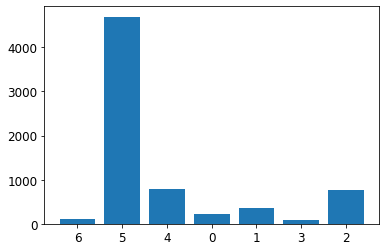

In [ ]:
import matplotlib.pyplot as plt
plt.bar(x, y)

## OverSampling

El siguiente código que hemos desarrollado sirve para hacer oversampling de las clases minoritarias para lograr el balanceo del dataset, aunque se trate de repetición de los mismos datos, conseguimos que la red se acostumbre a procesar todos los tipos de datos. Una desventaja es que aumentamos el tiempo de entrenamiento al aumentar los datos. Para evitar esto, y conseguir ejecuciones en tiempos razonables, se va a optar por una estrategia mixta, es decir para mantener el número de datos, se va a hacer Undersampling de la clase mayoritaria hasta los 1001 datos y oversampling del resto de clases hasta los 1001 datos cada una, obteniendo un conjunto de entrenamiento de 7007 instancias del mismo tamaño que el original.
Ya está ejecutado y es lento, no es necesario ejecutarlo de nuevo, tenemos una nueva carpeta ya generada en drive.

In [ ]:
'''index0 = np.hstack((np.arange(228), np.random.choice(228, size=1001-228, replace=True)))
index1 = np.hstack((np.arange(359), np.random.choice(359, size=1001-359, replace=True)))
index2 = np.hstack((np.arange(769), np.random.choice(769, size=1001-769, replace=True)))
index3 = np.hstack((np.arange(80), np.random.choice(80, size=1001-80, replace=True)))
index4 = np.hstack((np.arange(779), np.random.choice(779, size=1001-779, replace=True)))
index5 = np.random.choice(4693, size=1001, replace=False)
index6 = np.hstack((np.arange(99), np.random.choice(99, size=1001-99, replace=True)))
indexes = [index0, index1, index2, index3, index4, index5, index6]'''

In [ ]:
'''import shutil
import datetime
for i in range(7):
  f = './VC_PF/DermaMNIST/train/'+str(i)+'/'
  g = './VC_PF/DermaMNIST/resampled_train/'+str(i)+'/'
  j=0
  for path in os.listdir(f):
    if np.where(indexes[i]==j)[0].shape[0]>0:
      for k in range(np.where(indexes[i]==j)[0].shape[0]):
        shutil.copy(f+path, g+str(datetime.datetime.now())[-9:]+path)
    j=j+1'''

In [ ]:
#DataBlock 
from pathlib import Path
%cd '/content/gdrive/My Drive'
path = Path('VC_PF/DermaMNIST')
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), # La entrada está formada por una Imagen 'ImageBlock' y una Categoría 'CategoryBlock'
    get_items=get_image_files,  # Método para obtener las imagenes
    splitter=GrandparentSplitter(train_name='resampled_train', valid_name='valid'), # Método para dividir los datos de train y validation, el 0.1 hace referencia al 10% para validation, seed es la semilla para la aleatoriedad
    get_y=parent_label, # Etiqueta de salida
    item_tfms=Resize(224),
    batch_tfms = []
).dataloaders(path, bs=32)  # Cargamos los datos para train de path/'train' y en minibatches de tamaño 32

/content/gdrive/My Drive


In [ ]:
roc_auc_metric = RocAuc()
model = create_vision_model(fastai.vision.models.mobilenet_v3_small, 7, True, n_in=3)
learn = Learner(dls, model, loss_func=CrossEntropyLossFlat(), metrics=[accuracy, roc_auc_metric])  # Modelo de aprendizaje, con los datos de dls, la red neuronal que hemos definido,                                                                           # CrossEntropyLoss como función de perdida y accuracy como métrica
learn.summary()

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V3_Small_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V3_Small_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/mobilenet_v3_small-047dcff4.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v3_small-047dcff4.pth


  0%|          | 0.00/9.83M [00:00<?, ?B/s]

Sequential (Input shape: 32 x 3 x 224 x 224)
Layer (type)         Output Shape         Param #    Trainable 
                     32 x 16 x 112 x 112 
Conv2d                                    432        True      
BatchNorm2d                               32         True      
Hardswish                                                      
____________________________________________________________________________
                     32 x 16 x 56 x 56   
Conv2d                                    144        True      
BatchNorm2d                               32         True      
ReLU                                                           
____________________________________________________________________________
                     32 x 16 x 1 x 1     
AdaptiveAvgPool2d                                              
____________________________________________________________________________
                     32 x 8 x 1 x 1      
Conv2d                                    13

epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,1.354620,5.036681,0.045862,0.611488,17:41


epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,0.705661,1.493362,0.478564,0.838994,00:35
1,0.562304,1.183946,0.615155,0.881363,00:35
2,0.529358,1.303340,0.567298,0.888488,00:35
3,0.452667,1.512811,0.555334,0.857310,00:35
4,0.414877,1.026952,0.686939,0.873482,00:35
5,0.332019,1.454067,0.592223,0.876592,00:37
6,0.244638,1.204233,0.615155,0.891896,00:35
7,0.180393,1.317176,0.635095,0.890043,00:35
8,0.124900,1.886212,0.584247,0.862861,00:35
9,0.084425,1.524686,0.650050,0.899349,00:35


No improvement since epoch 4: early stopping


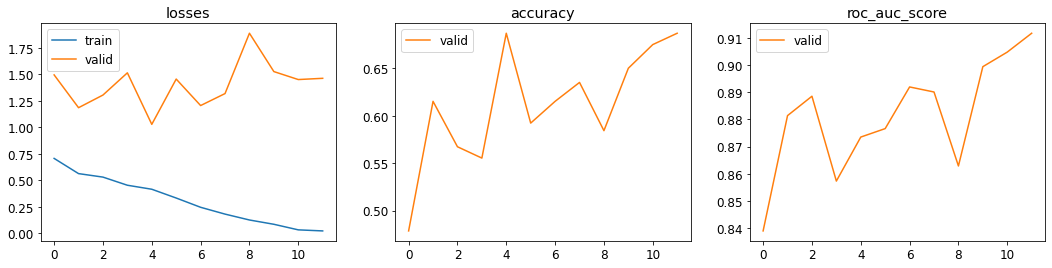

The test accuracy is :  70.7731 %
The test AUC ROC is :  92.1036 %


Number of test examples: 2005


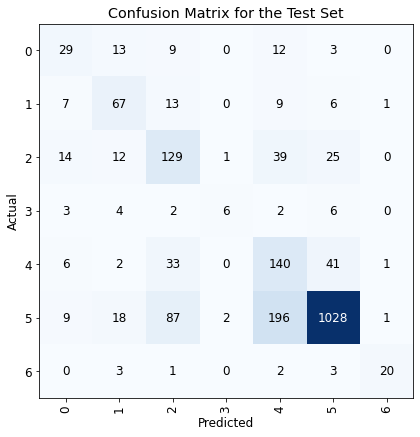

In [ ]:
experiment(learn, 15, files_test, cbs=EarlyStoppingCallback(monitor='accuracy', patience=7))

Como era de esperar el balanceo de clases mejora el AUC Score, pero aun sigue habiedno notables fallos al clasificar como se puede apreciar en la quinta columna. La precisión sobre el test ha empeorado notablemente en comparación con el modelo original, algo que era de esperar pues el desbalanceo que se manifiestaba en el conjunto original ha sido suplido con copias de elementos de dicho conjunto hasta tener el mismo número de elementos en cada clase, luego puede que haya muestras del entrenamiento que tengan mucho más peso que otras y que esto no refleje la realidad de nuestro problema.

## Inverse of Number of Samples (INS Balancing)

Ante el resultado obtenido con el Oversampling, vamos a considerar otros 2 métodos de tratar el desbalanceo mediante el uso de pesos en la función de pérdida.

INS es una técnica utilizada para tratar desequilibrios en la distribución de las clases en un conjunto de datos. Se asigna un peso más alto a las clases menos representadas para compensar su escasez y mejorar la precisión de la clasificación. Para ello se invierte el número de muestras de cada clase, de tal manera que las clases menos representadas reciban un peso mayor. La influencia de esta técnica en la clasificación es que puede mejorar métricas como la precisión o el AUC Score al proporcionar un tratamiento equilibrado de las clases desbalanceadas.


In [ ]:
label = [ 'akiec', 'bcc','bkl','df','mel', 'nv',  'vasc']
def estimate_weights_ins(label, y):
    y = np.array(y)
    class_weights = np.zeros_like(label, dtype=np.float32)
    counts = np.zeros_like(label)
    counts = y.astype(np.float32)
    for i, label in enumerate(label):
        class_weights[i] = 1.0 / counts[i]
    class_weights = class_weights / np.sum(class_weights)
    return class_weights

classweight= estimate_weights_ins(label, y)
for i in range(len(label)):
    print(label[i],":", classweight[i])

akiec : 0.31013554
bcc : 0.0065423865
bkl : 0.03941389
df : 0.13466412
mel : 0.08552484
nv : 0.38379276
vasc : 0.039926425


In [ ]:
#DataBlock 
path = Path('VC_PF/DermaMNIST')
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), # La entrada está formada por una Imagen 'ImageBlock' y una Categoría 'CategoryBlock'
    get_items=get_image_files,  # Método para obtener las imagenes
    splitter=GrandparentSplitter(train_name='train', valid_name='valid'), # Método para dividir los datos de train y validation, el 0.1 hace referencia al 10% para validation, seed es la semilla para la aleatoriedad
    get_y=parent_label, # Etiqueta de salida
    item_tfms=Resize(224),
    batch_tfms = []
).dataloaders(path, bs=32)  # Cargamos los datos para train de path/'train' y en minibatches de tamaño 32

In [ ]:
roc_auc_metric = RocAuc()
model = create_vision_model(fastai.vision.models.mobilenet_v3_small, 7, True, n_in=3)
learn = Learner(dls, model, loss_func=CrossEntropyLossFlat(weight=torch.from_numpy(classweight)), metrics=[accuracy, roc_auc_metric])  # Modelo de aprendizaje, con los datos de dls, la red neuronal que hemos definido,                                                                           # CrossEntropyLoss como función de perdida y accuracy como métrica
learn.summary()

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V3_Small_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V3_Small_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Sequential (Input shape: 32 x 3 x 224 x 224)
Layer (type)         Output Shape         Param #    Trainable 
                     32 x 16 x 112 x 112 
Conv2d                                    432        True      
BatchNorm2d                               32         True      
Hardswish                                                      
____________________________________________________________________________
                     32 x 16 x 56 x 56   
Conv2d                                    144        True      
BatchNorm2d                               32         True      
ReLU                                                           
____________________________________________________________________________
                     32 x 16 x 1 x 1     
AdaptiveAvgPool2d                                              
____________________________________________________________________________
                     32 x 8 x 1 x 1      
Conv2d                                    13

epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,0.846897,2.380735,0.668993,0.394065,00:36


epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,0.428905,1.348525,0.668993,0.819606,00:33
1,0.383406,1.093229,0.688933,0.832032,00:33
2,0.409199,1.134997,0.670987,0.871465,00:33
3,0.356092,1.220653,0.684945,0.889947,00:33
4,0.274779,1.006915,0.685942,0.889169,00:35
5,0.275114,1.102020,0.692921,0.874642,00:33
6,0.248214,1.029406,0.693918,0.914754,00:33
7,0.219626,1.229663,0.694915,0.858284,00:33
8,0.187052,1.084056,0.701894,0.905611,00:35
9,0.142223,0.973606,0.736790,0.915151,00:33


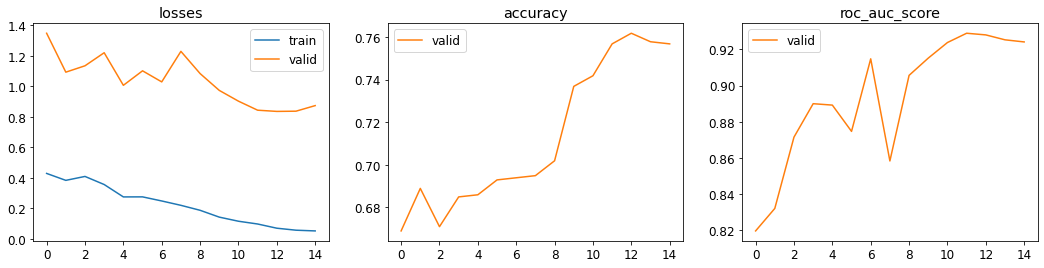

The test accuracy is :  76.0598 %
The test AUC ROC is :  91.9762 %


Number of test examples: 2005


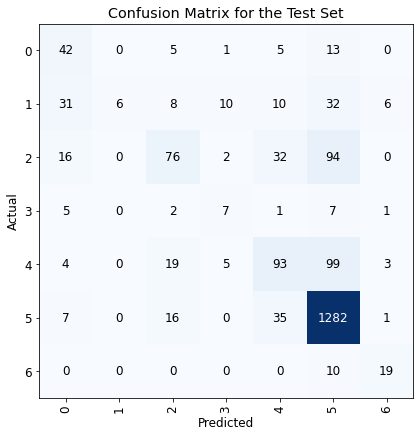

In [ ]:
experiment(learn, 15, files_test, cbs=EarlyStoppingCallback(monitor='accuracy', patience=7))

A diferencia de la técnica anterior, esta consigue pejorar el AUC Score, mejorando también la precisión sobre el test. El hecho de no empeorar el test se debe a que con esta técnica no provoca que cierta muestra tengan un peso mayor que otra, sino que son las clases como conjuntos las que tienen un peso mayor o menos en la función de pérdida. Lo que compensa el desbalanceo de clases y genera uno resultados bastante notables.
Haciendo referencia a la matriz de confusión, se puede observar como donde más se está fallando en proporción al número total de elementos de esa clase es en la cuarta fila, pues se falla en más de la mitad de elementos clasificados.

## Median Frequency Balancing

En este caso, la idea es similar, aplicar unos pesos en la función de pérdida para cada clase. En este caso, se asignan los pesos como el producto de los inversos de la frecuencia en cada clase por la mediana de las frecuencias de todas las clases. En este caso, no se normalizan los pesos posteriormente.
En CHAN, Robin, et al. Application of decision rules for handling class imbalance in semantic segmentation, se afirma que empíricamente se produce una mejora importante en el promedio del acierto en cada clase, pese a que ello provoque cierta disminución en el accuracy general. En nuestro caso es esperable que consigamos un buen resultado para AUc.

In [ ]:
label = [ 'akiec', 'bcc','bkl','df','mel', 'nv',  'vasc']

def estimate_weights_mfb(label, y):
    y = np.array(y)
    class_weights = np.zeros_like(label, dtype=np.float32)
    counts = np.zeros_like(label)
    counts = y.astype(np.float32)
    median_freq = np.median(counts)
    for i, label in enumerate(label):
        class_weights[i] = median_freq / counts[i]
    return class_weights

classweight= estimate_weights_mfb(label, y)
for i in range(len(label)):
    print(label[i],":", classweight[i])

akiec : 3.6262627
bcc : 0.07649691
bkl : 0.46084723
df : 1.5745614
mel : 1.0
nv : 4.4875
vasc : 0.46684006


In [ ]:
#DataBlock 
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), # La entrada está formada por una Imagen 'ImageBlock' y una Categoría 'CategoryBlock'
    get_items=get_image_files,  # Método para obtener las imagenes
    splitter=GrandparentSplitter(train_name='train', valid_name='valid'), # Método para dividir los datos de train y validation, el 0.1 hace referencia al 10% para validation, seed es la semilla para la aleatoriedad
    get_y=parent_label, # Etiqueta de salida
    item_tfms=Resize(224),
    batch_tfms = []
).dataloaders(path, bs=32)  # Cargamos los datos para train de path/'train' y en minibatches de tamaño 32

In [ ]:
roc_auc_metric = RocAuc()
model = create_vision_model(fastai.vision.models.mobilenet_v3_small, 7, True, n_in=3)
learn = Learner(dls, model, loss_func=CrossEntropyLossFlat(weight=torch.from_numpy(classweight)), metrics=[accuracy, roc_auc_metric])  # Modelo de aprendizaje, con los datos de dls, la red neuronal que hemos definido,                                                                           # CrossEntropyLoss como función de perdida y accuracy como métrica
learn.summary()

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V3_Small_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V3_Small_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Sequential (Input shape: 32 x 3 x 224 x 224)
Layer (type)         Output Shape         Param #    Trainable 
                     32 x 16 x 112 x 112 
Conv2d                                    432        True      
BatchNorm2d                               32         True      
Hardswish                                                      
____________________________________________________________________________
                     32 x 16 x 56 x 56   
Conv2d                                    144        True      
BatchNorm2d                               32         True      
ReLU                                                           
____________________________________________________________________________
                     32 x 16 x 1 x 1     
AdaptiveAvgPool2d                                              
____________________________________________________________________________
                     32 x 8 x 1 x 1      
Conv2d                                    13

epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,0.858453,2.114504,0.668993,0.493282,00:34


epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,0.463916,1.301093,0.668993,0.817804,00:34
1,0.405356,1.271871,0.672981,0.840619,00:36
2,0.405556,2.238502,0.678963,0.711394,00:35
3,0.319390,1.120250,0.682951,0.873168,00:33
4,0.289451,0.983612,0.690927,0.897934,00:34
5,0.273773,1.061372,0.691924,0.884516,00:33
6,0.258498,1.174323,0.685942,0.889082,00:33
7,0.241450,1.600973,0.672981,0.807799,00:35
8,0.227734,0.928782,0.719840,0.915170,00:37
9,0.179087,0.925746,0.720837,0.914120,00:42


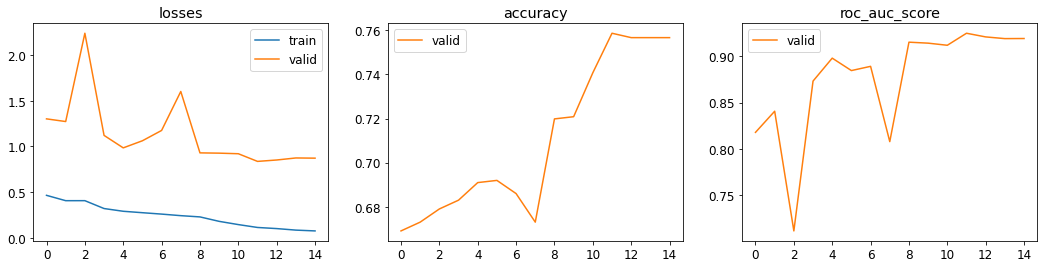

The test accuracy is :  75.2618 %
The test AUC ROC is :  92.3783 %


Number of test examples: 2005


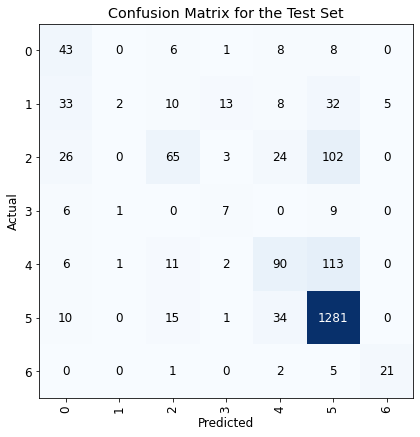

In [ ]:
experiment(learn, 15, files_test, cbs=EarlyStoppingCallback(monitor='accuracy', patience=10))

Como apreciamos los resultados finales son muy parecidos a la técnica anterior, pues ambas funcionan de manera similar. En este caso los pesos calculados obtienen una peor precisión sobre el test y un mejor puntaje sobre el AUC Score, aunque la diferencia no es muy grande.
En referencia ala matriz de confusión, se tiene el mismo problema anterior, una pésima clasificación de las muestras que provienen de la cuarta clase.

## Data Augmentation (default parameters)

En los problema de Visión por Computador pueden aparece imagenes a distintas escalas, rotadas, con distinta perspectiva. Es por ello que aumentar el número de datos teninedo transformaciones geométricas de los datos de entrenamiento originales provocará una mejora sobre el desempeño de nuestro modelo. En esta primera prueba se usarán los valores por defecto que ofrece el método ***aug_tranform***.

In [ ]:
#DataBlock 
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), # La entrada está formada por una Imagen 'ImageBlock' y una Categoría 'CategoryBlock'
    get_items=get_image_files,  # Método para obtener las imagenes
    splitter=GrandparentSplitter(train_name='train', valid_name='valid'), # Método para dividir los datos de train y validation, el 0.1 hace referencia al 10% para validation, seed es la semilla para la aleatoriedad
    get_y=parent_label, # Etiqueta de salida
    item_tfms=Resize(224),
    batch_tfms = [aug_transforms]
).dataloaders(path, bs=32)  # Cargamos los datos para train de path/'train' y en minibatches de tamaño 32

In [ ]:
roc_auc_metric = RocAuc()
model = create_vision_model(fastai.vision.models.mobilenet_v3_small, 7, True, n_in=3)
learn = Learner(dls, model, loss_func=CrossEntropyLossFlat(), metrics=[accuracy, roc_auc_metric])  # Modelo de aprendizaje, con los datos de dls, la red neuronal que hemos definido,                                                                           # CrossEntropyLoss como función de perdida y accuracy como métrica
learn.summary()

Sequential (Input shape: 32 x 3 x 224 x 224)
Layer (type)         Output Shape         Param #    Trainable 
                     32 x 16 x 112 x 112 
Conv2d                                    432        True      
BatchNorm2d                               32         True      
Hardswish                                                      
____________________________________________________________________________
                     32 x 16 x 56 x 56   
Conv2d                                    144        True      
BatchNorm2d                               32         True      
ReLU                                                           
____________________________________________________________________________
                     32 x 16 x 1 x 1     
AdaptiveAvgPool2d                                              
____________________________________________________________________________
                     32 x 8 x 1 x 1      
Conv2d                                    13

epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,1.434279,1.524705,0.668993,0.675908,00:33


epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,0.890420,0.773722,0.732802,0.896109,00:35
1,0.851499,0.807660,0.721834,0.911460,00:33
2,0.822972,0.739561,0.740778,0.908302,00:33
3,0.691862,0.716063,0.744766,0.918106,00:33
4,0.659743,0.778935,0.723828,0.914971,00:33
5,0.620348,0.838488,0.739781,0.911405,00:35
6,0.491225,0.708549,0.761715,0.930314,00:33
7,0.391967,0.869373,0.734796,0.916876,00:33
8,0.284780,0.841043,0.749751,0.916972,00:33
9,0.151423,1.025786,0.760718,0.909141,00:34


No improvement since epoch 6: early stopping


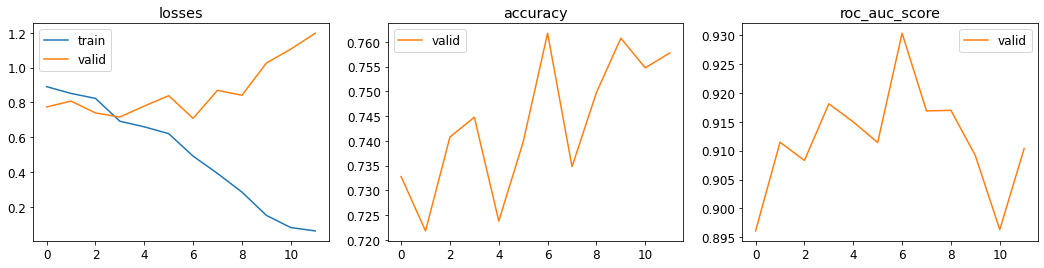

The test accuracy is :  76.4589 %
The test AUC ROC is :  91.9694 %


Number of test examples: 2005


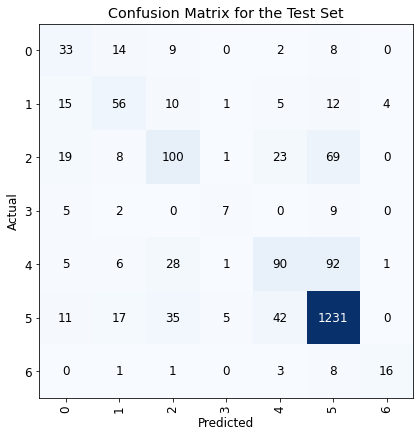

In [ ]:
experiment(learn, 15, files_test, cbs=EarlyStoppingCallback(monitor='accuracy', patience=5))

Vemos como Data Augmentarion ha mejorado todos los puntajes de precisión que teniamos hasta ahora, aunque si nos fijamos sobre el conjunto de validación, la curva hace algunos movimientos algo extraños, en vez de subir de manera constante. Se aprecia también como a partir de la epoca 6 empieza a haber overfitting algo que nuestro Early Stopping sobre el accuracy es capaz de detectar y se queda con el modelo entrenado hasta esa iteracción.
Por otro lado seguimos viendo como se falla demasiado en proporción en los elementos de la cuarta fila.

## Data Augmentation with Custom Head

Siguiendo con el Data Augmentation, vamos a intrudcir un nuevo Head al modelo original de MobileNet Small V3. El nuevo Head incluyes dos capas de convolución, ambas con ReLU y BatchNorm. El tamaño del kernel para cada convolución será de $3$ y se mantendrá el número de canales constante ($576$). Con estas nuevas capas de convolución se tendrá una mayor capacidad de aprendizaje, compensado con BatchNorm y ReLU para evitar overfitting. Data Augmentation también contribuira para evitar el overffiting, aportando mas variabilidad y ejemplos distintos al train.



In [ ]:
#DataBlock 
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), # La entrada está formada por una Imagen 'ImageBlock' y una Categoría 'CategoryBlock'
    get_items=get_image_files,  # Método para obtener las imagenes
    splitter=GrandparentSplitter(train_name='train', valid_name='valid'), # Método para dividir los datos de train y validation, el 0.1 hace referencia al 10% para validation, seed es la semilla para la aleatoriedad
    get_y=parent_label, # Etiqueta de salida
    item_tfms=Resize(224),
    batch_tfms = aug_transforms(max_rotate=180.0)
).dataloaders(path, bs=32)  # Cargamos los datos para train de path/'train' y en minibatches de tamaño 32

In [ ]:
custom_head = nn.Sequential(
  nn.Conv2d(in_channels=576, out_channels=576, kernel_size=(3, 3)),
  nn.BatchNorm2d(576),
  nn.ReLU(),
  nn.Conv2d(in_channels=576, out_channels=576, kernel_size=(3, 3)),
  nn.BatchNorm2d(576),
  nn.ReLU(),
  nn.Flatten(),
  nn.Linear(5184, 7)
)

roc_auc_metric = RocAuc()
model = create_vision_model(fastai.vision.models.mobilenet_v3_small, 7, True, n_in=3, custom_head=custom_head)
learn = Learner(dls, model, loss_func=CrossEntropyLossFlat(), metrics=[accuracy, roc_auc_metric]) 
learn.summary()

Sequential (Input shape: 32 x 3 x 224 x 224)
Layer (type)         Output Shape         Param #    Trainable 
                     32 x 16 x 112 x 112 
Conv2d                                    432        True      
BatchNorm2d                               32         True      
Hardswish                                                      
____________________________________________________________________________
                     32 x 16 x 56 x 56   
Conv2d                                    144        True      
BatchNorm2d                               32         True      
ReLU                                                           
____________________________________________________________________________
                     32 x 16 x 1 x 1     
AdaptiveAvgPool2d                                              
____________________________________________________________________________
                     32 x 8 x 1 x 1      
Conv2d                                    13

epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,1.006614,1.384126,0.665005,0.711069,00:35


epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,0.728685,0.755669,0.711864,0.908309,00:36
1,0.762670,0.675348,0.757727,0.925683,00:37
2,0.780058,0.660100,0.755733,0.928446,00:35
3,0.737450,0.796011,0.696909,0.896415,00:35
4,0.873233,0.778184,0.718843,0.908510,00:35
5,0.701580,0.646616,0.766700,0.928653,00:35
6,0.739332,0.635686,0.763709,0.930519,00:37
7,0.680782,0.699813,0.731805,0.924859,00:35
8,0.644950,0.618691,0.779661,0.937487,00:35
9,0.627900,0.592940,0.789631,0.939439,00:35


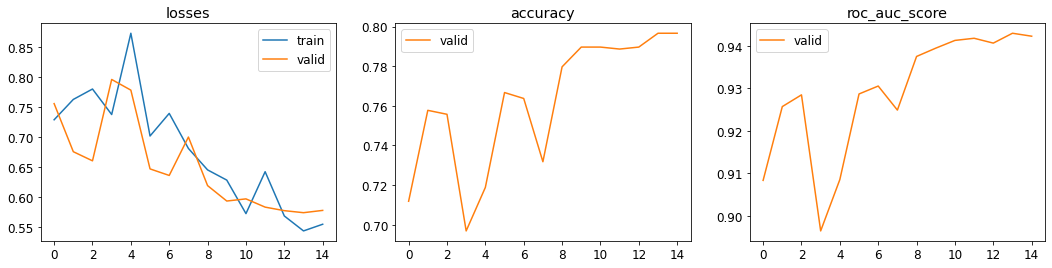

The test accuracy is :  78.3042 %
The test AUC ROC is :  94.8432 %


Number of test examples: 2005


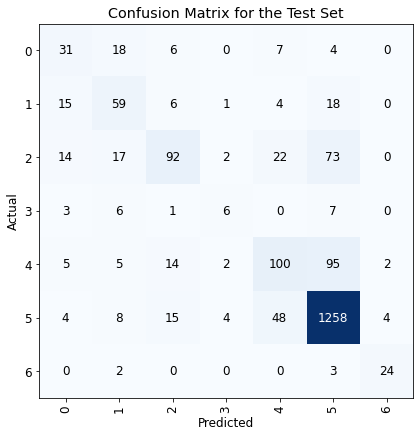

In [ ]:
experiment(learn, 15, files_test, cbs=EarlyStoppingCallback(monitor='accuracy', patience=5))

Este es el mejor intento hasta ahora, consiguiendo grandes puntajes en AUC Scorre y en accuracy. También cabe apreciar como la curva de la función de pérdida sobre el conjunto de validación y el train tienen una trayectoria similar, algo bastante bueno y que refleja que el modelo se comportará bien con elementos nuevos (que no poseia en el conjunto de entrenamiento). Se sigue apreciando algunos moviemientos extraños en la curva del accuracy sobre el conjunto de validación.
Por útlimo se sigue fallando en clasificar en más de la mitad de lo elementos de la cuarta fila.

## Data Augmentation Max Rotate 180º (BEST ACC SCORE)

Como ya se ha comentado antes, la técnica de Data Augmentation nos dá más ejemplos de entrenamiento haciendo transformaciones geométricas de los originales. En este caso se ha optado por modificar uno de los parámetros de ***aug_transform***, ***max_rotate*** (máximo número de grados que se puede rotar una imagen), cuyo valor por defecto es $10.0$. Hemos decidido aumentar este hasta $180.0$º pues atendiendo a la naturaleza de nuestro problema, las imagenes de las heridas y marcas en la piel girandolas de cualquier manera siguen haciendo referencia a la misma enfermedad y en la misma piel dichas heridas se pueden manifestar con distintas rotaciones. Luego de esta manera estamos introduciendo esta idea a nuestro modelo mejorando el desempeño de este.

In [ ]:
#DataBlock 
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), # La entrada está formada por una Imagen 'ImageBlock' y una Categoría 'CategoryBlock'
    get_items=get_image_files,  # Método para obtener las imagenes
    splitter=GrandparentSplitter(train_name='train', valid_name='valid'), # Método para dividir los datos de train y validation, el 0.1 hace referencia al 10% para validation, seed es la semilla para la aleatoriedad
    get_y=parent_label, # Etiqueta de salida
    item_tfms=Resize(224),
    batch_tfms = aug_transforms(max_rotate=180.0)
).dataloaders(path, bs=32)  # Cargamos los datos para train de path/'train' y en minibatches de tamaño 32

In [ ]:
roc_auc_metric = RocAuc()
model = create_vision_model(fastai.vision.models.mobilenet_v3_small, 7, True, n_in=3)
learn = Learner(dls, model, loss_func=CrossEntropyLossFlat(), metrics=[accuracy, roc_auc_metric])  # Modelo de aprendizaje, con los datos de dls, la red neuronal que hemos definido,                                                                           # CrossEntropyLoss como función de perdida y accuracy como métrica
learn.summary()

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V3_Small_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V3_Small_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Sequential (Input shape: 32 x 3 x 224 x 224)
Layer (type)         Output Shape         Param #    Trainable 
                     32 x 16 x 112 x 112 
Conv2d                                    432        True      
BatchNorm2d                               32         True      
Hardswish                                                      
____________________________________________________________________________
                     32 x 16 x 56 x 56   
Conv2d                                    144        True      
BatchNorm2d                               32         True      
ReLU                                                           
____________________________________________________________________________
                     32 x 16 x 1 x 1     
AdaptiveAvgPool2d                                              
____________________________________________________________________________
                     32 x 8 x 1 x 1      
Conv2d                                    13

epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,1.413583,1.483287,0.663011,0.608941,54:39


epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,0.906179,0.780549,0.727817,0.887331,00:34
1,0.834973,0.682973,0.747757,0.924532,00:34
2,0.791560,0.698795,0.755733,0.923536,00:36
3,0.772930,0.798192,0.714855,0.900096,00:34
4,0.728102,0.702744,0.754736,0.923988,00:34
5,0.738207,0.655614,0.755733,0.923520,00:34
6,0.693102,0.667740,0.755733,0.928076,00:34
7,0.687615,0.630111,0.782652,0.932575,00:36
8,0.678755,0.613091,0.770688,0.936494,00:34
9,0.627845,0.618822,0.773679,0.938510,00:34


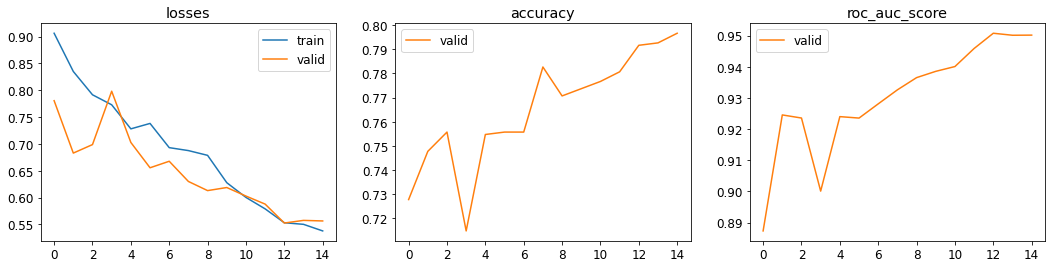

The test accuracy is :  80.0499 %
The test AUC ROC is :  94.8535 %


Number of test examples: 2005


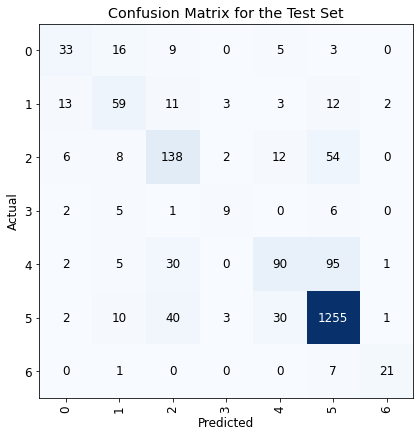

In [ ]:
experiment(learn, 15, files_test, cbs=EarlyStoppingCallback(monitor='accuracy', patience=5))

Esta técnica ha conseguido un gran desempeño, llegando a más del 80% de precisión y con AUC Score del 94.8%. Vemos como con esta técnica las curvas en el la función de pérdida tanto del conjunto de train como de validación van prácticamente añ unísono. A parte se ha conseguido una curva de validación bastante estable (solo tiene una iteración que se sale de la tendencia de la misma). Y también cabe recalcar como esta técnica ha solucionado un gran problema que se tenía antes y es que como se puede ver en la matriz de confusión, se ha aumentado e número de muestras predichas correctamente de la cuarta fila, pasando de 7 a 9. Seguramente como se ha comentado anteriormente el hecho de tener muestras desde distintos ángulos haya provocado que nuestro modelo sea capaz de aprender que el problema no depende de las distintas orientaciones de las imagenes que podría ser uno de lo mayores inconvenientes a la hora de tratar nuestro conjunto de datos.

## Data Augmentation +  INS Balancing

A continuación vamos a aplicar simultaneamente dos métodos mencionados anteriormente, Data Augmentation e INS Balancing. Con esto conseguiremos que se equilibre las proporciones de los conjuntos de entrenamiento en las función de pérdida, lo que mejorara el AUC Score y con Data Augmentation reduciremos el overfitting mejorando a su vez la precisión del modelo.

In [ ]:
#DataBlock 
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), # La entrada está formada por una Imagen 'ImageBlock' y una Categoría 'CategoryBlock'
    get_items=get_image_files,  # Método para obtener las imagenes
    splitter=GrandparentSplitter(train_name='train', valid_name='valid'), # Método para dividir los datos de train y validation, el 0.1 hace referencia al 10% para validation, seed es la semilla para la aleatoriedad
    get_y=parent_label, # Etiqueta de salida
    item_tfms=Resize(224),
    batch_tfms = aug_transforms(max_rotate=180.0)
).dataloaders(path, bs=32)  # Cargamos los datos para train de path/'train' y en minibatches de tamaño 32

In [ ]:
label = [ 'akiec', 'bcc','bkl','df','mel', 'nv',  'vasc']
def estimate_weights_ins(label, y):
    y = np.array(y)
    class_weights = np.zeros_like(label, dtype=np.float32)
    counts = np.zeros_like(label)
    counts = y.astype(np.float32)
    for i, label in enumerate(label):
        class_weights[i] = 1.0 / counts[i]
    class_weights = class_weights / np.sum(class_weights)
    return class_weights

classweight= estimate_weights_ins(label, y)
for i in range(len(label)):
    print(label[i],":", classweight[i])

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V3_Small_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V3_Small_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,0.885379,2.140255,0.668993,0.645868,00:37


epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,0.436190,1.535877,0.670987,0.779321,00:37
1,0.403461,1.276275,0.682951,0.835635,00:47
2,0.384391,2.471552,0.681954,0.789846,00:40
3,0.369968,1.491392,0.682951,0.797321,00:38
4,0.336859,1.023691,0.684945,0.899644,00:41
5,0.325202,1.090465,0.679960,0.903348,00:38
6,0.300339,1.099782,0.684945,0.911063,00:37
7,0.281959,1.166509,0.682951,0.907138,00:37
8,0.292086,0.930010,0.701894,0.920096,00:36
9,0.263623,0.951930,0.689930,0.910826,00:38


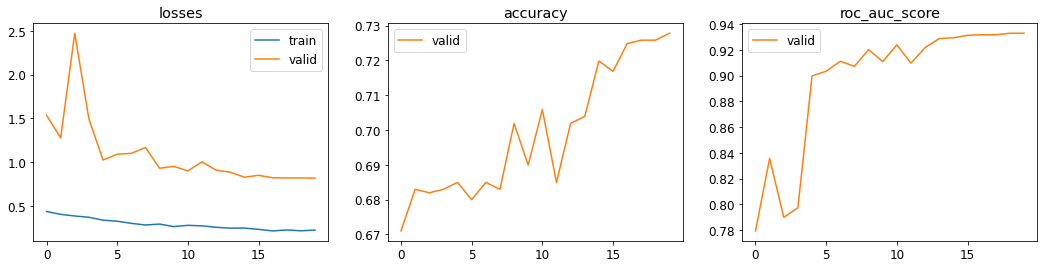

The test accuracy is :  72.6683 %
The test AUC ROC is :  93.6218 %


Number of test examples: 2005


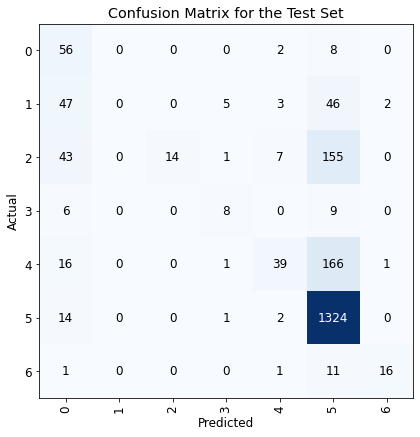

In [ ]:
pt = create_vision_model(fastai.vision.models.mobilenet_v3_small, 7, True, n_in=3)
roc_auc_metric = RocAuc()
learn = Learner(dls, pt, loss_func=CrossEntropyLossFlat(weight=torch.from_numpy(classweight)), metrics=[accuracy,roc_auc_metric])  # Modelo de aprendizaje, con los datos de dls, la red neuronal que hemos definido,                                                                           # CrossEntropyLoss como función de perdida y accuracy como métrica
learn.summary()
experiment(learn, 20, files_test, cbs=EarlyStoppingCallback(monitor='accuracy', patience=5))

Como era de esperar, con esta técnica se ha conseguido un mejor valor para el AUC Score, aunque se ha obtenido bastante peor valor de precisión en comparación a la utilización de los modelos por separado.

## Data Augmentation Max Rotate 180º with 3 freeze epochs (BEST AUC SCORE)

Ahora vamos a introducir una nueva técnica, que es el aumento del entrenamiento de los parámetros del Head del modelo frente al resto. Con esto conseguimos que parte no lineal de nuestro modelo, que es la que realmente genera el aprendizaje, lleve un preentrenamiento antes de entrenarse con el resto de parámetros lo que puede conllevar una mejora del desempeño final. Agregamos Data Augmentation con Max Rotate de 180º para aumentar más esta mejora, pues como hemos visto antes esta técnica consigue grandes resultados sobre nuestro problema.

In [ ]:
#DataBlock 
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), # La entrada está formada por una Imagen 'ImageBlock' y una Categoría 'CategoryBlock'
    get_items=get_image_files,  # Método para obtener las imagenes
    splitter=GrandparentSplitter(train_name='train', valid_name='valid'), # Método para dividir los datos de train y validation, el 0.1 hace referencia al 10% para validation, seed es la semilla para la aleatoriedad
    get_y=parent_label, # Etiqueta de salida
    item_tfms=Resize(224),
    batch_tfms = aug_transforms(max_rotate=180.0)
).dataloaders(path, bs=32)  # Cargamos los datos para train de path/'train' y en minibatches de tamaño 32

In [ ]:
roc_auc_metric = RocAuc()
model = create_vision_model(fastai.vision.models.mobilenet_v3_small, 7, True, n_in=3)
learn = Learner(dls, model, loss_func=CrossEntropyLossFlat(), metrics=[accuracy, roc_auc_metric]) 
learn.summary()

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V3_Small_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V3_Small_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Sequential (Input shape: 32 x 3 x 224 x 224)
Layer (type)         Output Shape         Param #    Trainable 
                     32 x 16 x 112 x 112 
Conv2d                                    432        True      
BatchNorm2d                               32         True      
Hardswish                                                      
____________________________________________________________________________
                     32 x 16 x 56 x 56   
Conv2d                                    144        True      
BatchNorm2d                               32         True      
ReLU                                                           
____________________________________________________________________________
                     32 x 16 x 1 x 1     
AdaptiveAvgPool2d                                              
____________________________________________________________________________
                     32 x 8 x 1 x 1      
Conv2d                                    13

epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,1.772617,1.599035,0.584247,0.591891,00:34
1,1.191615,0.991973,0.691924,0.849059,00:34
2,1.014739,1.090434,0.680957,0.865185,00:34


epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,0.773805,0.687019,0.757727,0.912795,00:36
1,0.736989,0.676910,0.749751,0.925354,00:36
2,0.771379,0.695924,0.734796,0.927774,00:35
3,0.753700,0.664718,0.757727,0.926025,00:35
4,0.723791,0.702900,0.744766,0.928379,00:34
5,0.729749,0.638976,0.772682,0.935214,00:34
6,0.714142,0.660672,0.755733,0.930605,00:36
7,0.670598,0.600842,0.776670,0.942946,00:34
8,0.674488,0.587440,0.778664,0.939088,00:34
9,0.624462,0.588498,0.796610,0.941404,00:34


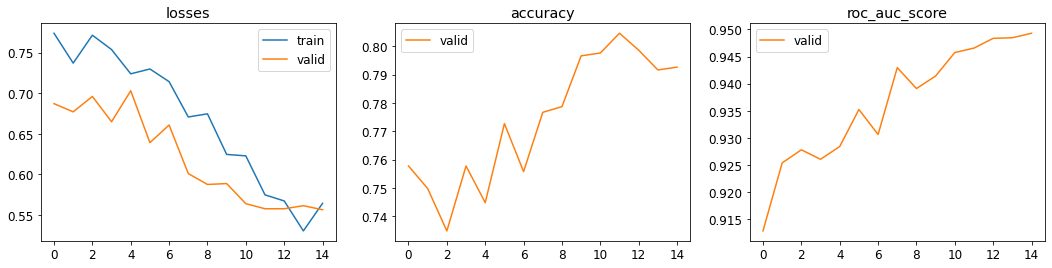

The test accuracy is :  80.0 %
The test AUC ROC is :  95.1499 %


Number of test examples: 2005


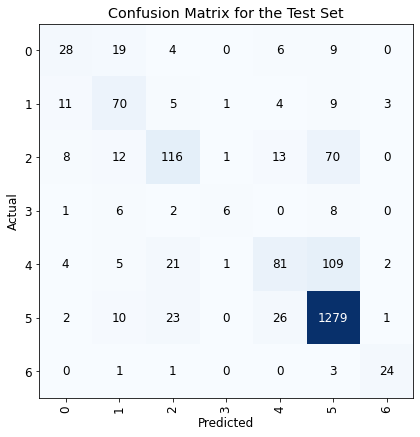

In [ ]:
experiment(learn, 15, files_test, cbs=EarlyStoppingCallback(monitor='accuracy', patience=5), freeze_epochs=3)

Se puede apreciar como la combinación de ambas técnicas ha producido un mejor resultado final sobre el AUC Score encompración con el uso de la técnica de Data Augmentation con Max Rotate igual a 180º. También la precisión sobre el test es ligeramente inferiror a la precisión con el método original. 
En cuanto a la matriz de confusiones, se ve como los elementos de la sexta y séptima fila estan prácticamente todos bien clasificados (siendo la sexta fila la que tiene un mayor número de muestras y por ellos los resultados sobre accuracy y AUC Score dependen mayoritariamente de esta clase).

## Data Augmentation Bigger Max Zoom

En este método haremos algo similar a lo que se hizo al usar Max Rotate de 180º en el Data Augmentation. Esta vez lo que haremos será aumentar el zoom máximo del método ***aug_transform***, cuyo parámetro por defecto tiene un valor de $1.1$, el cual sustituiremos por $1.5$, esto aportará una mayor capacidad de invarianza a escalas aparte de la ya intrinseca de los filtros convolucionales menor riesgo de overfitting). Además se ha observado en la naturaleza de los datos que algunas imagenes de las lesiones son más lejanas, con esta técnica podremos extraer características más precisas en esos casos.

In [ ]:
#DataBlock 
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), # La entrada está formada por una Imagen 'ImageBlock' y una Categoría 'CategoryBlock'
    get_items=get_image_files,  # Método para obtener las imagenes
    splitter=GrandparentSplitter(train_name='train', valid_name='valid'), # Método para dividir los datos de train y validation, el 0.1 hace referencia al 10% para validation, seed es la semilla para la aleatoriedad
    get_y=parent_label, # Etiqueta de salida
    item_tfms=Resize(224),
    batch_tfms = aug_transforms(max_zoom=1.5)
).dataloaders(path, bs=32)  # Cargamos los datos para train de path/'train' y en minibatches de tamaño 32

In [ ]:
roc_auc_metric = RocAuc()
model = create_vision_model(fastai.vision.models.mobilenet_v3_small, 7, True, n_in=3)
learn = Learner(dls, model, loss_func=CrossEntropyLossFlat(), metrics=[accuracy, roc_auc_metric]) 
learn.summary()

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V3_Small_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V3_Small_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Sequential (Input shape: 32 x 3 x 224 x 224)
Layer (type)         Output Shape         Param #    Trainable 
                     32 x 16 x 112 x 112 
Conv2d                                    432        True      
BatchNorm2d                               32         True      
Hardswish                                                      
____________________________________________________________________________
                     32 x 16 x 56 x 56   
Conv2d                                    144        True      
BatchNorm2d                               32         True      
ReLU                                                           
____________________________________________________________________________
                     32 x 16 x 1 x 1     
AdaptiveAvgPool2d                                              
____________________________________________________________________________
                     32 x 8 x 1 x 1      
Conv2d                                    13

epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,1.537392,1.744676,0.668993,0.555708,00:44


epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,0.974870,0.828299,0.721834,0.880594,00:35
1,0.937071,0.849492,0.722831,0.879349,00:43
2,0.858473,0.672379,0.758724,0.922063,00:37
3,0.824377,1.393999,0.672981,0.793517,00:36
4,0.796176,0.699062,0.752742,0.915938,00:35
5,0.708061,0.666057,0.761715,0.925743,00:36
6,0.681322,0.685662,0.747757,0.925428,00:36
7,0.712316,0.770886,0.728814,0.926671,00:37
8,0.639535,0.610254,0.765703,0.940511,00:35
9,0.660629,0.612403,0.769691,0.938581,00:35


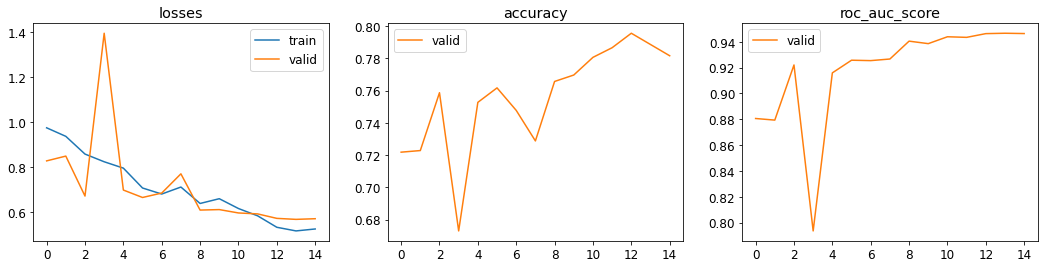

The test accuracy is :  80.399 %
The test AUC ROC is :  94.8994 %


Number of test examples: 2005


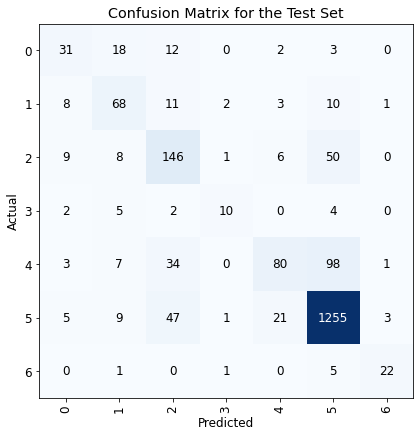

In [ ]:
experiment(learn, 15, files_test, cbs=EarlyStoppingCallback(monitor='accuracy', patience=5))

Vemos como al igual que tratando el problema de las distintas orientaciones en las que una herida puede manifestarse en el cuerpo, o puede tomarse la foto sobre ella, también tartar el problema de escalas sobre las herida genera un gran resultado, siendo el segundo mejor accuracy obtenido en el estudio y teniendo un gran puntaje en el AUC Score. Bemos como no hay overfitting pues ambas curvas de la función de pérdida siguen conjuntamente un sentido descendente.
En cuanto a la matriz de confusión podemos apreciar como la clasificación sobre los elementos de la cuarta categoría es la mejor hasta ahora, siendo de 10 (casi la mitad). Tambien hay un gran acierto en los elementos correspondientes a la tercera clase, algo que no había ocurrido con anterioridad. Seguramente el hecho de la mala clasificación anterior sobre estos elementos tenga bastante relación con el problema de escalas.

## Data Augmentation Max Rotate 360º

Este método sería como una segunda versión del Data Augmentation con 180º como Max Rotate, solo que esta vez se probará con 360º (un giro completo) pudiendo tener imagenes sobre una misma herida en cualquier orientación posible. Se espera resultados similareas a 180º, aunque algunas veces el dejar un mayor abanico de variabilidad puede generar que el modelo no genere unas predicciones tan acertadas a cuando se le deja menor variabilidad.

In [ ]:
#DataBlock 
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), # La entrada está formada por una Imagen 'ImageBlock' y una Categoría 'CategoryBlock'
    get_items=get_image_files,  # Método para obtener las imagenes
    splitter=GrandparentSplitter(train_name='train', valid_name='valid'), # Método para dividir los datos de train y validation, el 0.1 hace referencia al 10% para validation, seed es la semilla para la aleatoriedad
    get_y=parent_label, # Etiqueta de salida
    item_tfms=Resize(224),
    batch_tfms = aug_transforms(max_rotate=360.0)
).dataloaders(path, bs=32)  # Cargamos los datos para train de path/'train' y en minibatches de tamaño 32

In [ ]:
roc_auc_metric = RocAuc()
model = create_vision_model(fastai.vision.models.mobilenet_v3_small, 7, True, n_in=3)
learn = Learner(dls, model, loss_func=CrossEntropyLossFlat(), metrics=[accuracy, roc_auc_metric])  # Modelo de aprendizaje, con los datos de dls, la red neuronal que hemos definido,                                                                           # CrossEntropyLoss como función de perdida y accuracy como métrica
learn.summary()

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V3_Small_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V3_Small_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Sequential (Input shape: 32 x 3 x 224 x 224)
Layer (type)         Output Shape         Param #    Trainable 
                     32 x 16 x 112 x 112 
Conv2d                                    432        True      
BatchNorm2d                               32         True      
Hardswish                                                      
____________________________________________________________________________
                     32 x 16 x 56 x 56   
Conv2d                                    144        True      
BatchNorm2d                               32         True      
ReLU                                                           
____________________________________________________________________________
                     32 x 16 x 1 x 1     
AdaptiveAvgPool2d                                              
____________________________________________________________________________
                     32 x 8 x 1 x 1      
Conv2d                                    13

epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,1.495857,1.374697,0.668993,0.731515,00:36


epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,1.033787,0.851290,0.720837,0.869525,00:36
1,0.983102,0.734022,0.719840,0.911472,00:36
2,0.901150,0.717616,0.741775,0.912202,00:35
3,0.796220,0.713427,0.739781,0.915111,00:38
4,0.765825,0.688889,0.745763,0.919085,00:35
5,0.739454,0.705257,0.739781,0.912286,00:36
6,0.714880,0.633574,0.767697,0.932147,00:35
7,0.674862,0.633349,0.772682,0.936754,00:35
8,0.675056,0.660109,0.756730,0.929587,00:38
9,0.655000,0.604372,0.781655,0.938336,00:36


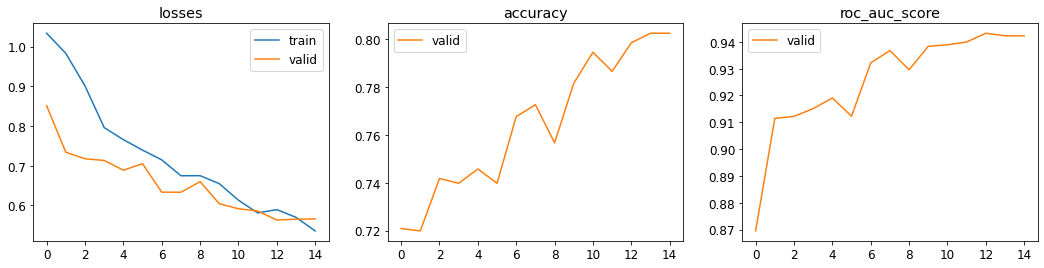

The test accuracy is :  79.1521 %
The test AUC ROC is :  94.8729 %


Number of test examples: 2005


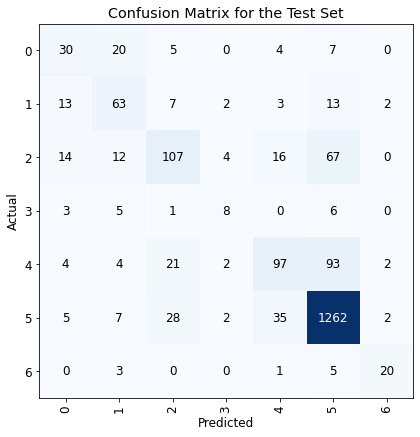

In [ ]:
experiment(learn, 15, files_test, cbs=EarlyStoppingCallback(monitor='accuracy', patience=5))

A pesar de que se podía esperar un mejor puntaje que en la técnica con 180º, el aumento de variabilidad ha producido que nuestro modelo le cueste más aprender y que finalmente se quede un punto por debajo en cuanto a la precisión en comparación con el método con 180º. La matriz de confusión es muy similar a la del método de 180º aunque ligeramente inferior en todas las predicciones correctas.

## Data Augmentation Max Rotate 180º + Normalization

Combinación de Data Aumentation con 180º de Max Rotate con normalización. Con esta técnica se espera una mejor optimización en el entrenamiento del modelo, junto a un buen desempeño final provocado por el Data Augmentation con Max Rotate de 180º, el cual como se ha visto antes en la técnica que mejor resultados nos ofrece sobre el problema que estamos tratando.

In [ ]:
#DataBlock 
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), # La entrada está formada por una Imagen 'ImageBlock' y una Categoría 'CategoryBlock'
    get_items=get_image_files,  # Método para obtener las imagenes
    splitter=GrandparentSplitter(train_name='train', valid_name='valid'), # Método para dividir los datos de train y validation, el 0.1 hace referencia al 10% para validation, seed es la semilla para la aleatoriedad
    get_y=parent_label, # Etiqueta de salida
    item_tfms=Resize(224),
    batch_tfms = [*aug_transforms(max_rotate=180.0), Normalize.from_stats(m, s)]
).dataloaders(path, bs=32)  # Cargamos los datos para train de path/'train' y en minibatches de tamaño 32

In [ ]:
roc_auc_metric = RocAuc()
model = create_vision_model(fastai.vision.models.mobilenet_v3_small, 7, True, n_in=3)
learn = Learner(dls, model, loss_func=CrossEntropyLossFlat(), metrics=[accuracy, roc_auc_metric])  # Modelo de aprendizaje, con los datos de dls, la red neuronal que hemos definido,                                                                           # CrossEntropyLoss como función de perdida y accuracy como métrica
learn.summary()

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V3_Small_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V3_Small_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Sequential (Input shape: 32 x 3 x 224 x 224)
Layer (type)         Output Shape         Param #    Trainable 
                     32 x 16 x 112 x 112 
Conv2d                                    432        True      
BatchNorm2d                               32         True      
Hardswish                                                      
____________________________________________________________________________
                     32 x 16 x 56 x 56   
Conv2d                                    144        True      
BatchNorm2d                               32         True      
ReLU                                                           
____________________________________________________________________________
                     32 x 16 x 1 x 1     
AdaptiveAvgPool2d                                              
____________________________________________________________________________
                     32 x 8 x 1 x 1      
Conv2d                                    13

epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,1.479792,1.392583,0.668993,0.828937,00:37


epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,1.029108,0.831084,0.720837,0.849284,00:43
1,0.965623,0.770211,0.737787,0.903561,00:42
2,0.839796,0.720792,0.730808,0.912810,00:46
3,0.778820,0.672372,0.755733,0.920425,00:37
4,0.773617,0.655900,0.743769,0.928360,00:44
5,0.770737,0.673571,0.758724,0.930312,00:40
6,0.708478,0.631369,0.772682,0.933383,00:36
7,0.698446,0.642450,0.752742,0.938475,00:36
8,0.635168,0.624169,0.768694,0.937561,00:43
9,0.656386,0.586629,0.780658,0.943318,00:36


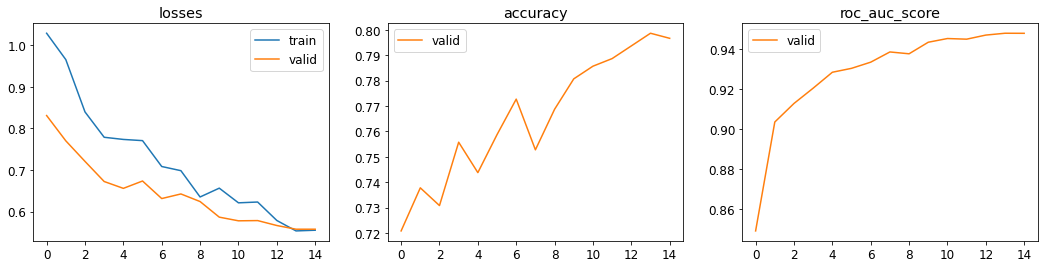

The test accuracy is :  79.0524 %
The test AUC ROC is :  94.4653 %


Number of test examples: 2005


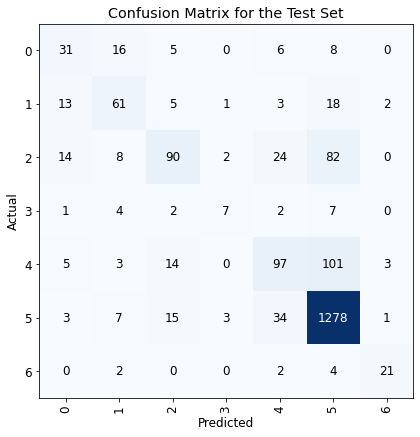

In [ ]:
experiment(learn, 15, files_test, cbs=EarlyStoppingCallback(monitor='accuracy', patience=5))

Como pasbaa a la hora de utilizar normalización con el modelo base, los resultados se mpeoran consiguiendo un punto menos en la precisión y un valor ligeramente inferior en el AUC Score. En cuanto a la matriz de confusión, los resultados son similares a los del método original, aunque inferiores en todas las categorias predichas correctamente.

## Varios Data Augmentation

En este método se utilizarán varios parámetros simultanemanete de ***aug_transform***, a los cuales se les aumentará el rango de variabilidad, con lo que conseguiremos un menor overffiting y tratar problemas como el de las escalas.

In [ ]:
#DataBlock 
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), # La entrada está formada por una Imagen 'ImageBlock' y una Categoría 'CategoryBlock'
    get_items=get_image_files,  # Método para obtener las imagenes
    splitter=GrandparentSplitter(train_name='train', valid_name='valid'), # Método para dividir los datos de train y validation, el 0.1 hace referencia al 10% para validation, seed es la semilla para la aleatoriedad
    get_y=parent_label, # Etiqueta de salida
    item_tfms=Resize(224),
    batch_tfms = aug_transforms(max_rotate=180.0, max_zoom=1.5, max_warp=0.5, max_lighting=0.5)
).dataloaders(path, bs=32)  # Cargamos los datos para train de path/'train' y en minibatches de tamaño 32

In [ ]:
roc_auc_metric = RocAuc()
model = create_vision_model(fastai.vision.models.mobilenet_v3_small, 7, True, n_in=3)
learn = Learner(dls, model, loss_func=CrossEntropyLossFlat(), metrics=[accuracy, roc_auc_metric]) 
learn.summary()

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V3_Small_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V3_Small_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Sequential (Input shape: 32 x 3 x 224 x 224)
Layer (type)         Output Shape         Param #    Trainable 
                     32 x 16 x 112 x 112 
Conv2d                                    432        True      
BatchNorm2d                               32         True      
Hardswish                                                      
____________________________________________________________________________
                     32 x 16 x 56 x 56   
Conv2d                                    144        True      
BatchNorm2d                               32         True      
ReLU                                                           
____________________________________________________________________________
                     32 x 16 x 1 x 1     
AdaptiveAvgPool2d                                              
____________________________________________________________________________
                     32 x 8 x 1 x 1      
Conv2d                                    13

epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,1.566163,2.750338,0.667996,0.618305,00:37


epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,1.015110,0.962543,0.682951,0.863360,00:41
1,0.931834,0.725429,0.735793,0.907831,00:36
2,0.942343,0.816269,0.713858,0.893031,00:39
3,0.869370,0.750715,0.712861,0.904210,00:44
4,0.857037,0.767185,0.704885,0.907803,00:40
5,0.822743,0.714635,0.734796,0.920846,00:41
6,0.777710,0.710473,0.743769,0.915820,00:37
7,0.781668,0.685862,0.746760,0.926122,00:37
8,0.769045,0.884899,0.680957,0.913065,00:37
9,0.754445,0.747287,0.695912,0.922248,00:37


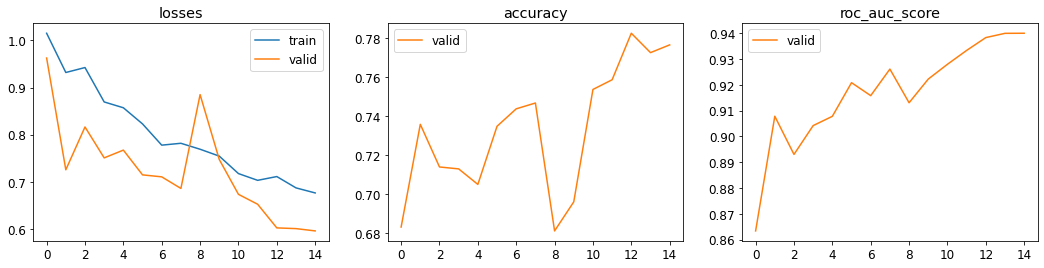

The test accuracy is :  76.8579 %
The test AUC ROC is :  94.2116 %


Number of test examples: 2005


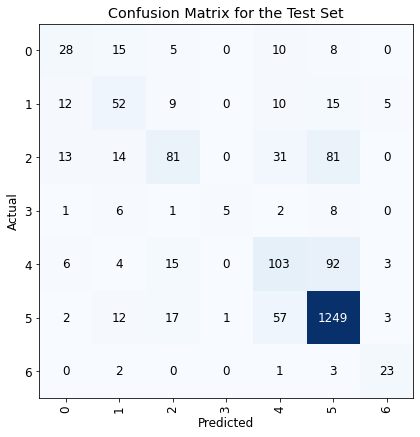

In [ ]:
experiment(learn, 15, files_test, cbs=EarlyStoppingCallback(monitor='accuracy', patience=5))

Vemos como el aumento de trasformaciones no mejoran los métodos vistos anteriormente, pese a que se está combienando tanto el Maz Zoom igual a 1.5 y el Max Rotate igual 180º, técnicas que como hemos visto antes da grandes resultados. Probablemente esto se deba al mismo problema qu econ Max Rotate igual a 360º, estamos añadiendo tanta variabilidad al conjunto de entrenamiento que nuestro modelo no es capaz de aprender las características concretas que resuelven el problema y por lo tanto se consiguen resultados peores. La matriz de confusión tiene una distribución similar a la del método con Max Rotate 180º aunque bastante inferior en cuanto al número de muestras categorizadas correctamente.

#Data Augmentation Bigger Max Zoom + Max Rotate 180º with 3 freeze epochs

Por último este método es una combinación de los dos parámetros que mejor resultados han dado sobre el Data Augmentation, junto el entrenamiento previo de 3 epocas sobre los parámetros del Head. Con esto se espera un buen resultado sobre el accuracy y tratar los probelmas de escalas lo que provocará un menor overfitting.

In [ ]:
#DataBlock 
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), # La entrada está formada por una Imagen 'ImageBlock' y una Categoría 'CategoryBlock'
    get_items=get_image_files,  # Método para obtener las imagenes
    splitter=GrandparentSplitter(train_name='train', valid_name='valid'), # Método para dividir los datos de train y validation, el 0.1 hace referencia al 10% para validation, seed es la semilla para la aleatoriedad
    get_y=parent_label, # Etiqueta de salida
    item_tfms=Resize(224),
    batch_tfms = aug_transforms(max_rotate=180.0, max_zoom=1.5)
).dataloaders(path, bs=32)  # Cargamos los datos para train de path/'train' y en minibatches de tamaño 32

In [ ]:
roc_auc_metric = RocAuc()
model = create_vision_model(fastai.vision.models.mobilenet_v3_small, 7, True, n_in=3)
learn = Learner(dls, model, loss_func=CrossEntropyLossFlat(), metrics=[accuracy, roc_auc_metric]) 
learn.summary()

Sequential (Input shape: 32 x 3 x 224 x 224)
Layer (type)         Output Shape         Param #    Trainable 
                     32 x 16 x 112 x 112 
Conv2d                                    432        True      
BatchNorm2d                               32         True      
Hardswish                                                      
____________________________________________________________________________
                     32 x 16 x 56 x 56   
Conv2d                                    144        True      
BatchNorm2d                               32         True      
ReLU                                                           
____________________________________________________________________________
                     32 x 16 x 1 x 1     
AdaptiveAvgPool2d                                              
____________________________________________________________________________
                     32 x 8 x 1 x 1      
Conv2d                                    13

epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,1.898121,1.369119,0.668993,0.641957,00:36
1,1.264673,1.102947,0.668993,0.784134,00:36
2,1.071457,1.332431,0.623131,0.830400,00:36


epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,0.862179,0.779849,0.737787,0.884638,00:36
1,0.845009,0.754986,0.753739,0.895990,00:35
2,0.837243,0.684795,0.742772,0.925518,00:38
3,0.762524,0.750614,0.725823,0.920841,00:36
4,0.760156,0.726950,0.738784,0.909163,00:36
5,0.762521,0.663633,0.752742,0.927212,00:36
6,0.720403,0.673618,0.759721,0.931316,00:36
7,0.673612,0.611145,0.776670,0.938863,00:38
8,0.655558,0.613210,0.770688,0.935609,00:36
9,0.674271,0.598969,0.776670,0.944734,00:36


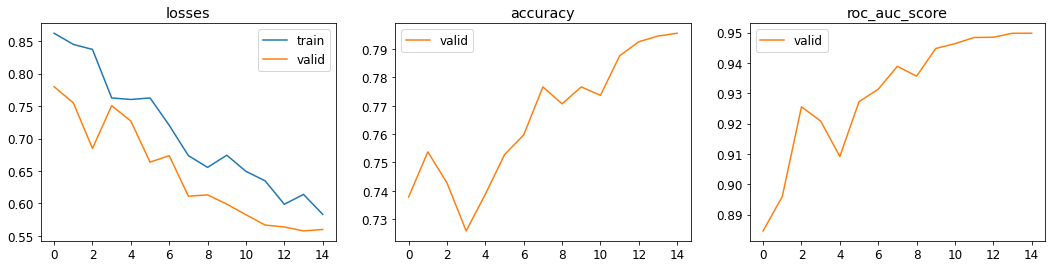

The test accuracy is :  79.2519 %
The test AUC ROC is :  94.746 %


Number of test examples: 2005


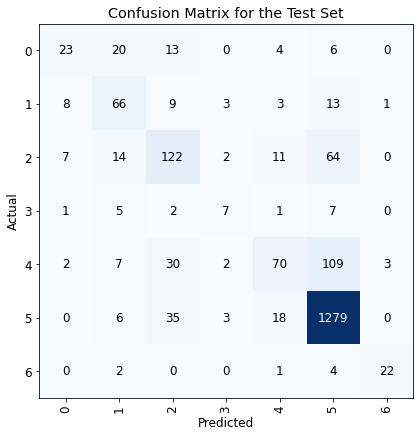

In [ ]:
experiment(learn, 15, files_test, cbs=EarlyStoppingCallback(monitor='accuracy', patience=5), freeze_epochs=3)

Vemos como ahora el juntar tanto el Max Rotate como el Max Zoom ha dado resultados bastantes buenos, lo que nos lleva a pensar que tanto el cambio de iluminación como de warp de la imagen solo inducen a error a la hora de entrenar. Podemos observar en la matriz de confusiones como sigue sin poder clasificarse bien a los elementos de la tercera categoría.

#Comparación

A continuación tenemos un resumen de los puntajes obtenidos con algunos de los distintos métodos aplicados en esta práctica, así como los dos modelos que utilizaremos para comparar extraidos del paper, Resnet-18(28)[6] y Google AutoML Vision.

| Methods              | AUC     | ACC     |
|----------------------|---------|---------|
| <font color='red'>ResNet-18(28)[6]     | <font color='red'>$0.8990$ | <font color='red'>$0.7210$ |
| <font color='red'>Google AutoML Vision | <font color='red'>**0.9250** | <font color='red'>**0.7660** |
| MobileNet Small V3 (224) TL | $0.9023$ | $0.7511$ |
| MobileNet Small V3 (224) TL + OverSampling | $0.9210$ | $0.7077$|
| MobileNet Small V3 (224) TL + INS Balancing | $0.9198$ | $0.7606$|
| MobileNet Small V3 (224) TL + Median Frequency Balancing | $0.9238$ | $0.7526$ |
| MobileNet Small V3 (224) TL (Custom Head) + Data Augmentation | $0.9484$ | $0.7830$ |
| MobileNet Small V3 (224) TL + INS Balancing + Data Augmentation | $0.9362$ | $0.7267$ |
| MobileNet Small V3 (224) TL + Data Augmentation Max Rotate 180º| $0.9485$ | **0.8005**|
| MobileNet Small V3 (224) TL + Data Augmentation Max Rotate 180º+ 3 Freeze Epochs| **0.9515** | $0.8000$ |

(**Nota: en esta tabla no se encuentran todos los métodos, sino aquellos con buenos resultados y con técnicas distintas*)

Cabe recalcar como MobileNet de base ya obtiene un grán puntaje que puede superar y por bastante a Resnet-18 e incluso llegar a poder competir con Google AutoML Vision, por lo tanto podemos decir que este modelo es bastante recomendado para el problema que hemos tratado. A parte algo que no se ha mencionado en los métodos, es la gran velocidad de entrenamiento de esta red, algo a tener muy en cuenta dependediendo del estudio que se esté haciendo.

Podemos observer como el mayor accuracy obtenido en este trabajo (MobileNet Small V3 (224) TL + Data Augmentation Max Rotate 180º) supera y con creces al mayor accuracy del paper, clasificando correctamente casi a un 4% más de muestras. Como ya se ha mencionado anteriormente el hecho de hacer que la máquina sea capaz de reconocer que clase de herida independientemente de la orientación es algo que ha mejorado bastante la puntuación base y además es algo lógico y natural debido a que cuando una herida se manifiesta en nuestra piel esta puede aparecer en cualquier orientación (también en distintas escalas, algo que hemos podido corroborar que efectivamente también mejora los resultados), a demás de que las fotos de las heridas pueden estar tomadas en cualquier orientación.

También vemos como el usar un Custom-Head ha mejorado considerablemente al modelos base, utilizando dos capas de de convolución y ofreciendole al modelo una mayor capacidad de aprendizaje.

La utilización de las técnicas de balaceo de INS y Median Frequency Balancing, han producido un resultado bastente decente, mejorando el valor del AUC Score, llegando a alcanzar un valor bastante similiar al de Google AutoML Vision.

Por otro lado he hecho de juntar los métodos de Freeze Epochs y Max Rotate igual a 180º, vemos como ha conseguido un valor similar de accuracy, al método original y también como ha superado el 95% en AUC Score, superando por tres puntos al AUC socre más grande del paper.

#Conclusión

Vemos como a partir de un conjunto de imagenes sobre heridas cutáneas hemos podido construir un modelos que acierta el tipo de herida con 80% de precisión. Con ello podemos ver como el aprendizaje automático en el ambito sanitario es capaz de tener grandes resultados. Esto es algo muy importante de cara al futuro pués con avances de este tipo se podrán conseguir que las personas sean diagnosticadas cualquier herida cutánea, algo que seguramente con el tiempo se pueda extrapolar a cualquier enfermedad, sin necesidad de un médico o una persona que supervise esto, algo que puede facilitar muchas tareas sanitarias y agilizar muchos procesos que actualmente son muy laboriosos y generan largas listas de espera. 

## Bibliografía y documentación consultada


[1] CHAN, Robin, et al. Application of decision rules for handling class imbalance in semantic segmentation. arXiv preprint arXiv:1901.08394, 2019.

[2] CUI, Yin, et al. Class-balanced loss based on effective number of samples. En Proceedings of the IEEE/CVF conference on computer vision and pattern recognition. 2019. p. 9268-9277.

[3] HOWARD, Andrew, et al. Searching for mobilenetv3. En Proceedings of the IEEE/CVF international conference on computer vision. 2019. p. 1314-1324.

[4] LÓPEZ, V., Fernández, A., Moreno-Torres, J. G., & Herrera, F. (2012). Analysis of preprocessing vs. cost-sensitive learning for imbalanced classification. Open problems on intrinsic data characteristics. Expert Systems with Applications, 39(7), 6585-6608.

[5] YANG, Jiancheng, et al. Medmnist v2: A large-scale lightweight benchmark for 2d and 3d biomedical image classification. arXiv preprint arXiv:2110.14795, 2021.


[6] Documentación y descarga del dataset. https://github.com/MedMNIST/MedMNIST

[7] Documentaciónd de fastai v2. https://docs.fast.ai/vision.augment.html

[8] Documentación de métricas de Sklearn. https://devdocs.io/scikit_learn/modules/generated/sklearn.metrics.roc_auc_score#sklearn.metrics.roc_auc_score

[9] https://paperswithcode.com/method/hard-swish